In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

#SP 500 (large cap) & its Santa return (1962 - 2022)

In [ ]:
#Monthly data with variables
sp500daily=pd.read_excel('/content/gdrive/MyDrive/SP 500 daily return.xlsx', sheet_name= "Daily")  #SP 500 daily price level and return (1962-2023)
santadaily=pd.read_excel('/content/gdrive/MyDrive/SP 500 daily return.xlsx', sheet_name= "SantaDaily")  #SP 500 santa day price level and return (1962-2023)

In [ ]:
#original data set
sp500daily = sp500daily.dropna()  #drop NA
sp500daily

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index
1,1962-07-03,56.49,0.011278
2,1962-07-05,56.81,0.005665
3,1962-07-06,56.17,-0.011266
4,1962-07-09,56.55,0.006765
5,1962-07-10,57.20,0.011494
...,...,...,...
15238,2023-01-13,3999.09,0.003997
15239,2023-01-17,3990.97,-0.002030
15240,2023-01-18,3928.86,-0.015563
15241,2023-01-19,3898.85,-0.007638


In [ ]:
#summary stats
sp500daily.describe()  
#From 1962-2023, daily sp 500 return was about 0.0334%

,Level of the S&P 500 Index,Return on the S&P 500 Index
count,15242.000000,15242.000000
mean,882.504172,0.000334
std,1009.499507,0.010399
min,53.490000,-0.204669
25%,104.222500,-0.004305
50%,419.925000,0.000462
75%,1298.075000,0.005203
max,4796.560000,0.115800


In [ ]:
#original data set
santadaily = santadaily.dropna()  #drop NA
santadaily
#Day column measures which day it is in the santa week (1-7)

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index,Day
0,1962-12-24,62.63,-0.000160,1
1,1962-12-26,63.02,0.006227,2
2,1962-12-27,62.93,-0.001428,3
3,1962-12-28,62.96,0.000477,4
4,1962-12-31,63.10,0.002224,5
...,...,...,...,...
422,2022-12-28,3783.22,-0.012021,3
423,2022-12-29,3849.28,0.017461,4
424,2022-12-30,3839.50,-0.002541,5
425,2023-01-03,3824.14,-0.004001,6


In [ ]:
#summary stats
santadaily.describe() 
#From 1962-2023, daily santa day return was about 0.1227%

,Level of the S&P 500 Index,Return on the S&P 500 Index,Day
count,427.000000,427.000000,427.000000
mean,911.397658,0.001705,4.000000
std,1058.519666,0.009373,2.002346
min,62.630000,-0.038345,1.000000
25%,105.730000,-0.003041,2.000000
50%,437.980000,0.000927,4.000000
75%,1275.260000,0.005731,6.000000
max,4796.560000,0.050099,7.000000


In [ ]:
sp500daily.skew()

<ipython-input-8-91f77ab80b4f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sp500daily.skew()


Level of the S&P 500 Index     1.625283
Return on the S&P 500 Index   -0.615386
dtype: float64

In [ ]:
santadaily.skew()

<ipython-input-9-c54944d3dc89>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  santadaily.skew()


Level of the S&P 500 Index     1.674985
Return on the S&P 500 Index    0.685791
Day                            0.000000
dtype: float64

In [ ]:
sp500daily.kurt()

<ipython-input-10-d0de1da2160e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sp500daily.kurt()


Level of the S&P 500 Index      2.396392
Return on the S&P 500 Index    19.893104
dtype: float64

In [ ]:
santadaily.kurt()

<ipython-input-11-5551759c5b93>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  santadaily.kurt()


Level of the S&P 500 Index     2.620478
Return on the S&P 500 Index    4.723219
Day                           -1.250577
dtype: float64

In [ ]:
#summary stats for each day (1-7)
print("The Stats summary of the first day of the Santa Claus Rally is")
print(santadaily.loc[santadaily['Day'] == 1, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the second day of the Santa Claus Rally is")
print(santadaily.loc[santadaily['Day'] == 2, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the third day of the Santa Claus Rally is")
print(santadaily.loc[santadaily['Day'] == 3, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the fourth day of the Santa Claus Rally is")
print(santadaily.loc[santadaily['Day'] == 4, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the fifth day of the Santa Claus Rally is")
print(santadaily.loc[santadaily['Day'] == 5, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the sixth day of the Santa Claus Rally is")
print(santadaily.loc[santadaily['Day'] == 6, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the seventh day of the Santa Claus Rally is")
print(santadaily.loc[santadaily['Day'] == 7, 'Return on the S&P 500 Index'].describe())

The Stats summary of the first day of the Santa Claus Rally is
count    61.000000
mean      0.002066
std       0.007577
min      -0.027112
25%      -0.001807
50%       0.001252
75%       0.005868
max       0.024403
Name: Return on the S&P 500 Index, dtype: float64
The Stats summary of the second day of the Santa Claus Rally is
count    61.000000
mean      0.003156
std       0.009244
min      -0.025593
25%      -0.000951
50%       0.002248
75%       0.006227
max       0.049594
Name: Return on the S&P 500 Index, dtype: float64
The Stats summary of the third day of the Santa Claus Rally is
count    61.000000
mean      0.000295
std       0.007396
min      -0.016029
25%      -0.003991
50%       0.000374
75%       0.003979
max       0.020890
Name: Return on the S&P 500 Index, dtype: float64
The Stats summary of the fourth day of the Santa Claus Rally is
count    61.000000
mean      0.001459
std       0.006820
min      -0.011050
25%      -0.002977
50%       0.000477
75%       0.003988
max    

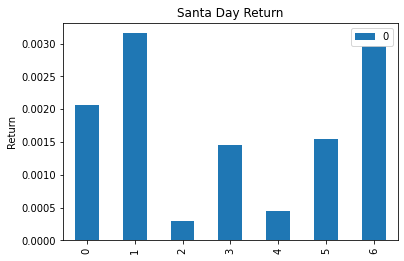

In [ ]:
#santa day return plot (1-7)
day = [santadaily.loc[santadaily['Day'] == 1, 'Return on the S&P 500 Index'].mean(), 
       santadaily.loc[santadaily['Day'] == 2, 'Return on the S&P 500 Index'].mean(),
       santadaily.loc[santadaily['Day'] == 3, 'Return on the S&P 500 Index'].mean(),
       santadaily.loc[santadaily['Day'] == 4, 'Return on the S&P 500 Index'].mean(),
       santadaily.loc[santadaily['Day'] == 5, 'Return on the S&P 500 Index'].mean(),
       santadaily.loc[santadaily['Day'] == 6, 'Return on the S&P 500 Index'].mean(),
       santadaily.loc[santadaily['Day'] == 7, 'Return on the S&P 500 Index'].mean()]

dfday = pd.DataFrame(day)
dfday

# plot
ax = dfday.plot(kind='bar', figsize=(6, 4), title='Santa Day Return', ylabel='Return')

In [ ]:
#Transform date to year only
sp500daily['Calendar Date'] = pd.DatetimeIndex(sp500daily['Calendar Date']).year
sp500daily1 = sp500daily

sp500daily2 = sp500daily1.groupby('Calendar Date').agg(['mean','std'])
sp500daily2

Level of the S&P 500 Index              \
                                    mean         std   
Calendar Date                                          
1962                           58.672160    2.333311   
1963                           69.860558    3.029395   
1964                           81.371542    2.826957   
1965                           88.153294    2.600847   
1966                           85.181984    5.575158   
...                                  ...         ...   
2019                         2913.357937  150.667995   
2020                         3217.856482  319.225747   
2021                         4273.406627  287.456408   
2022                         4098.514741  291.830199   
2023                         3918.060769   63.634781   

              Return on the S&P 500 Index            
                                     mean       std  
Calendar Date                                        
1962                             0.001010  0.008293  
1963                             0.000704  0.005399  
1964                             0.000488  0.003294  
1965                             0.000353  0.004261  
1966                            -0.000529  0.007432  
...                                   ...       ...  
2019                             0.001038  0.007855  
2020                             0.000832  0.021690  
2021                             0.000980  0.008251  
2022                            -0.000745  0.015228  
2023                             0.002684  0.011333  

[62 rows x 4 columns]

In [ ]:
sp500daily2.iloc[:,2].describe()

count    62.000000
mean      0.000375
std       0.000689
min      -0.001587
25%       0.000055
50%       0.000485
75%       0.000817
max       0.002684
Name: (Return on the S&P 500 Index, mean), dtype: float64

In [ ]:
#Transform date to year only
santadaily['Calendar Date'] = pd.DatetimeIndex(santadaily['Calendar Date']).year
santadaily

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index,Day
0,1962,62.63,-0.000160,1
1,1962,63.02,0.006227,2
2,1962,62.93,-0.001428,3
3,1962,62.96,0.000477,4
4,1962,63.10,0.002224,5
...,...,...,...,...
422,2022,3783.22,-0.012021,3
423,2022,3849.28,0.017461,4
424,2022,3839.50,-0.002541,5
425,2023,3824.14,-0.004001,6


In [ ]:
santadaily1=santadaily
santadaily1.head(8)

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index,Day
0,1962,62.63,-0.000160,1
1,1962,63.02,0.006227,2
2,1962,62.93,-0.001428,3
3,1962,62.96,0.000477,4
4,1962,63.10,0.002224,5
5,1963,62.69,-0.006498,6
6,1963,63.72,0.016430,7
7,1963,73.97,0.002168,1


In [ ]:
#day 6 and 7 belong to previous year santa week
for i in range(0,427):
   if santadaily1.iloc[i,3] > 5:
     santadaily1.iloc[i,0] = santadaily1.iloc[i,0]-1

santadaily1

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index,Day
0,1962,62.63,-0.000160,1
1,1962,63.02,0.006227,2
2,1962,62.93,-0.001428,3
3,1962,62.96,0.000477,4
4,1962,63.10,0.002224,5
...,...,...,...,...
422,2022,3783.22,-0.012021,3
423,2022,3849.28,0.017461,4
424,2022,3839.50,-0.002541,5
425,2022,3824.14,-0.004001,6


In [ ]:
#each year santa mean daily return and std (1962-2022)
santadaily2 = santadaily1.groupby('Calendar Date').agg(['mean','std'])
santadaily2

Level of the S&P 500 Index             \
                                    mean        std   
Calendar Date                                         
1962                           63.007143   0.357758   
1963                           74.748571   0.580702   
1964                           84.277143   0.323559   
1965                           91.990000   0.367786   
1966                           80.672857   0.419631   
...                                  ...        ...   
2018                         2465.448571  54.846731   
2019                         3235.440000  12.321358   
2020                         3725.868571  19.143591   
2021                         4786.515714  10.716739   
2022                         3831.882857  23.831618   

              Return on the S&P 500 Index            Day            
                                     mean       std mean       std  
Calendar Date                                                       
1962                             0.002467  0.007252  4.0  2.160247  
1963                             0.003241  0.002143  4.0  2.160247  
1964                             0.000822  0.004630  4.0  2.160247  
1965                             0.000115  0.003967  4.0  2.160247  
1966                            -0.002002  0.002876  4.0  2.160247  
...                                   ...       ...  ...       ...  
2018                             0.002115  0.025576  4.0  2.160247  
2019                             0.000493  0.005579  4.0  2.160247  
2020                             0.001449  0.008062  4.0  2.160247  
2021                             0.002051  0.006082  4.0  2.160247  
2022                             0.001180  0.009745  4.0  2.160247  

[61 rows x 6 columns]

In [ ]:
#weekly santa average return needs to time 7, which is 0.1227% * 7 = 0.8589%
santadaily2.iloc[:,2].describe()

count    61.000000
mean      0.001705
std       0.003397
min      -0.005775
25%       0.000115
50%       0.001593
75%       0.003068
max       0.010396
Name: (Return on the S&P 500 Index, mean), dtype: float64

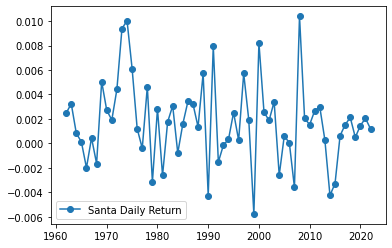

In [ ]:
##plot each year santa mean daily return and std (1962-2022)
from matplotlib import pyplot as plt

x = range(1962,2023)
y = santadaily2.iloc[:,2]

fig, ax = plt.subplots()
ax.plot(x, y.T, 'o-', label='Santa Daily Return')
#y_avg = 0.008589
#ax.plot(x, y_avg, color='red', lw=6, ls='--', label="average plot")

plt.legend(loc=0)
plt.show()

#SP 500 first period (1962 to 1977)

In [ ]:
#first period
sp500dailyfirst = sp500daily.iloc[0:3631,:]
sp500dailyfirst

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index
1,1962,56.49,0.011278
2,1962,56.81,0.005665
3,1962,56.17,-0.011266
4,1962,56.55,0.006765
5,1962,57.20,0.011494
...,...,...,...
3627,1976,106.34,-0.004027
3628,1976,106.88,0.005078
3629,1976,107.46,0.005427
3630,1977,107.00,-0.004281


In [ ]:
sp500dailyfirst.describe()

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index
count,3631.000000,3631.000000,3631.000000
mean,1969.262462,90.370328,0.000205
std,4.208115,13.166319,0.007633
min,1962.000000,53.490000,-0.036713
25%,1966.000000,82.860000,-0.003710
50%,1969.000000,91.450000,0.000327
75%,1973.000000,100.390000,0.004159
max,1977.000000,120.240000,0.050224


In [ ]:
santadailyfirst = santadaily.iloc[0:112,:]
santadailyfirst

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index,Day
0,1962,62.63,-0.000160,1
1,1962,63.02,0.006227,2
2,1962,62.93,-0.001428,3
3,1962,62.96,0.000477,4
4,1962,63.10,0.002224,5
...,...,...,...,...
107,1977,94.75,0.000634,3
108,1977,94.94,0.002005,4
109,1977,95.10,0.001685,5
110,1977,93.82,-0.013460,6


In [ ]:
santadailyfirst.describe()

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index,Day
count,112.00000,112.000000,112.000000,112.000000
mean,1969.50000,90.903393,0.002739,4.000000
std,4.63049,13.823004,0.007310,2.008989
min,1962.00000,62.630000,-0.013460,1.000000
25%,1965.75000,83.225000,-0.001684,2.000000
50%,1969.50000,92.190000,0.002034,4.000000
75%,1973.25000,100.087500,0.006079,6.000000
max,1977.00000,119.570000,0.030571,7.000000


In [ ]:
sp500dailyfirst.skew()

Calendar Date                 -0.019613
Level of the S&P 500 Index    -0.414631
Return on the S&P 500 Index    0.268019
dtype: float64

In [ ]:
sp500dailyfirst.kurt()

Calendar Date                 -1.205174
Level of the S&P 500 Index    -0.194406
Return on the S&P 500 Index    3.265125
dtype: float64

In [ ]:
santadailyfirst.skew()

Calendar Date                  0.000000
Level of the S&P 500 Index    -0.300859
Return on the S&P 500 Index    0.950265
Day                            0.000000
dtype: float64

In [ ]:
santadailyfirst.kurt()

Calendar Date                 -1.209646
Level of the S&P 500 Index    -0.238507
Return on the S&P 500 Index    2.137789
Day                           -1.252106
dtype: float64

In [ ]:
print("The Stats summary of the first day of the Santa Claus Rally is")
print(santadailyfirst.loc[santadailyfirst['Day'] == 1, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the second day of the Santa Claus Rally is")
print(santadailyfirst.loc[santadailyfirst['Day'] == 2, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the third day of the Santa Claus Rally is")
print(santadailyfirst.loc[santadailyfirst['Day'] == 3, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the fourth day of the Santa Claus Rally is")
print(santadailyfirst.loc[santadailyfirst['Day'] == 4, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the fifth day of the Santa Claus Rally is")
print(santadailyfirst.loc[santadailyfirst['Day'] == 5, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the sixth day of the Santa Claus Rally is")
print(santadailyfirst.loc[santadailyfirst['Day'] == 6, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the seventh day of the Santa Claus Rally is")
print(santadailyfirst.loc[santadailyfirst['Day'] == 7, 'Return on the S&P 500 Index'].describe())

The Stats summary of the first day of the Santa Claus Rally is
count    16.000000
mean      0.002252
std       0.006948
min      -0.007268
25%      -0.002089
50%       0.001042
75%       0.008542
max       0.013948
Name: Return on the S&P 500 Index, dtype: float64
The Stats summary of the second day of the Santa Claus Rally is
count    16.000000
mean      0.005609
std       0.007945
min      -0.005769
25%       0.000500
50%       0.005762
75%       0.007933
max       0.030571
Name: Return on the S&P 500 Index, dtype: float64
The Stats summary of the third day of the Santa Claus Rally is
count    16.000000
mean      0.001281
std       0.007054
min      -0.006965
25%      -0.003931
50%      -0.000348
75%       0.003309
max       0.020890
Name: Return on the S&P 500 Index, dtype: float64
The Stats summary of the fourth day of the Santa Claus Rally is
count    16.000000
mean      0.000530
std       0.004132
min      -0.008975
25%      -0.002279
50%       0.001044
75%       0.003939
max    

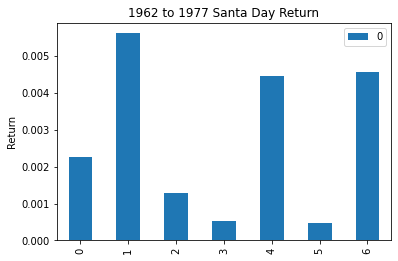

In [ ]:
day = [santadailyfirst.loc[santadailyfirst['Day'] == 1, 'Return on the S&P 500 Index'].mean(), 
       santadailyfirst.loc[santadailyfirst['Day'] == 2, 'Return on the S&P 500 Index'].mean(),
       santadailyfirst.loc[santadailyfirst['Day'] == 3, 'Return on the S&P 500 Index'].mean(),
       santadailyfirst.loc[santadailyfirst['Day'] == 4, 'Return on the S&P 500 Index'].mean(),
       santadailyfirst.loc[santadailyfirst['Day'] == 5, 'Return on the S&P 500 Index'].mean(),
       santadailyfirst.loc[santadailyfirst['Day'] == 6, 'Return on the S&P 500 Index'].mean(),
       santadailyfirst.loc[santadailyfirst['Day'] == 7, 'Return on the S&P 500 Index'].mean()]

dfday = pd.DataFrame(day)
dfday

# plot
ax = dfday.plot(kind='bar', figsize=(6, 4), title='1962 to 1977 Santa Day Return', ylabel='Return')

#SP 500 Second period (1978 to 1993)

In [ ]:
sp500dailysecond = sp500daily.iloc[3632:7676,:]
sp500dailysecond

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index
3633,1977,105.02,0.002482
3634,1977,105.01,-0.000095
3635,1977,105.20,0.001809
3636,1977,104.12,-0.010266
3637,1977,103.40,-0.006915
...,...,...,...
7672,1992,437.98,-0.002664
7673,1992,438.82,0.001918
7674,1992,435.71,-0.007087
7675,1993,435.38,-0.000757


In [ ]:
sp500dailysecond.describe()

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index
count,4044.000000,4044.000000,4044.000000
mean,1984.513848,213.426014,0.000400
std,4.610268,105.104097,0.009766
min,1977.000000,86.900000,-0.204669
25%,1981.000000,116.345000,-0.004595
50%,1985.000000,170.470000,0.000421
75%,1989.000000,304.772500,0.005255
max,1993.000000,441.280000,0.090994


In [ ]:
sp500dailysecond.skew()

Calendar Date                 -0.000123
Level of the S&P 500 Index     0.531413
Return on the S&P 500 Index   -2.324720
dtype: float64

In [ ]:
sp500dailysecond.kurt()

Calendar Date                  -1.208271
Level of the S&P 500 Index     -1.092435
Return on the S&P 500 Index    53.110563
dtype: float64

In [ ]:
santadailysecond = santadaily.iloc[112:224,:]
santadailysecond

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index,Day
112,1978,96.31,0.016894,1
113,1978,97.52,0.012564,2
114,1978,96.66,-0.008819,3
115,1978,96.28,-0.003931,4
116,1978,96.11,-0.001766,5
...,...,...,...,...
219,1993,470.58,-0.000764,3
220,1993,468.64,-0.004123,4
221,1993,466.45,-0.004673,5
222,1993,465.44,-0.002165,6


In [ ]:
santadailysecond.describe()

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index,Day
count,112.00000,112.000000,112.000000,112.000000
mean,1985.50000,244.664643,0.001436,4.000000
std,4.63049,119.638573,0.009280,2.008989
min,1978.00000,96.110000,-0.025593,1.000000
25%,1981.75000,138.247500,-0.004173,2.000000
50%,1985.50000,226.725000,0.001430,4.000000
75%,1989.25000,334.840000,0.005441,6.000000
max,1993.00000,470.940000,0.035859,7.000000


In [ ]:
santadailysecond.skew()

Calendar Date                  0.000000
Level of the S&P 500 Index     0.516487
Return on the S&P 500 Index    0.352370
Day                            0.000000
dtype: float64

In [ ]:
santadailysecond.kurt()

Calendar Date                 -1.209646
Level of the S&P 500 Index    -1.050887
Return on the S&P 500 Index    1.802932
Day                           -1.252106
dtype: float64

In [ ]:
print("The Stats summary of the first day of the Santa Claus Rally is")
print(santadailysecond.loc[santadailysecond['Day'] == 1, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the second day of the Santa Claus Rally is")
print(santadailysecond.loc[santadailysecond['Day'] == 2, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the third day of the Santa Claus Rally is")
print(santadailysecond.loc[santadailysecond['Day'] == 3, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the fourth day of the Santa Claus Rally is")
print(santadailysecond.loc[santadailysecond['Day'] == 4, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the fifth day of the Santa Claus Rally is")
print(santadailysecond.loc[santadailysecond['Day'] == 5, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the sixth day of the Santa Claus Rally is")
print(santadailysecond.loc[santadailysecond['Day'] == 6, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the seventh day of the Santa Claus Rally is")
print(santadailysecond.loc[santadailysecond['Day'] == 7, 'Return on the S&P 500 Index'].describe())

The Stats summary of the first day of the Santa Claus Rally is
count    16.000000
mean      0.003708
std       0.006910
min      -0.006856
25%       0.000411
50%       0.002746
75%       0.006959
max       0.017607
Name: Return on the S&P 500 Index, dtype: float64
The Stats summary of the second day of the Santa Claus Rally is
count    16.000000
mean      0.000157
std       0.009164
min      -0.025593
25%      -0.001868
50%       0.000770
75%       0.003429
max       0.013798
Name: Return on the S&P 500 Index, dtype: float64
The Stats summary of the third day of the Santa Claus Rally is
count    16.000000
mean     -0.001560
std       0.006004
min      -0.011276
25%      -0.005615
50%      -0.001714
75%       0.003384
max       0.009439
Name: Return on the S&P 500 Index, dtype: float64
The Stats summary of the fourth day of the Santa Claus Rally is
count    16.000000
mean      0.002713
std       0.007303
min      -0.006443
25%      -0.003160
50%       0.002070
75%       0.005217
max    

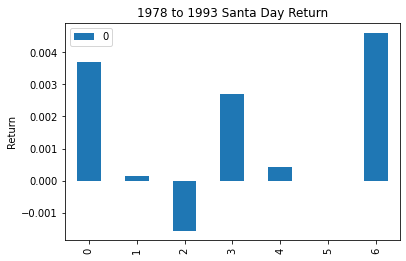

In [ ]:
day = [santadailysecond.loc[santadailysecond['Day'] == 1, 'Return on the S&P 500 Index'].mean(), 
       santadailysecond.loc[santadailysecond['Day'] == 2, 'Return on the S&P 500 Index'].mean(),
       santadailysecond.loc[santadailysecond['Day'] == 3, 'Return on the S&P 500 Index'].mean(),
       santadailysecond.loc[santadailysecond['Day'] == 4, 'Return on the S&P 500 Index'].mean(),
       santadailysecond.loc[santadailysecond['Day'] == 5, 'Return on the S&P 500 Index'].mean(),
       santadailysecond.loc[santadailysecond['Day'] == 6, 'Return on the S&P 500 Index'].mean(),
       santadailysecond.loc[santadailysecond['Day'] == 7, 'Return on the S&P 500 Index'].mean()]

dfday = pd.DataFrame(day)
dfday

# plot
ax = dfday.plot(kind='bar', figsize=(6, 4), title='1978 to 1993 Santa Day Return', ylabel='Return')

#SP 500 third period (1994 to 2008)

In [ ]:
sp500dailythird = sp500daily.iloc[7676:11707,:]
sp500dailythird

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index
7677,1993,434.52,0.000414
7678,1993,430.73,-0.008722
7679,1993,429.05,-0.003900
7680,1993,430.95,0.004428
7681,1993,431.04,0.000209
...,...,...,...
11703,2008,869.42,-0.003873
11704,2008,890.64,0.024407
11705,2008,903.25,0.014158
11706,2009,931.80,0.031608


In [ ]:
sp500dailythird.describe()

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index
count,4031.000000,4031.000000,4031.000000
mean,2000.501364,1020.626078,0.000258
std,4.614244,333.251400,0.011830
min,1993.000000,429.050000,-0.090350
25%,1996.000000,750.675000,-0.004931
50%,2000.000000,1107.830000,0.000489
75%,2005.000000,1285.945000,0.005717
max,2009.000000,1565.150000,0.115800


In [ ]:
santadailythird = santadaily.iloc[224:329,:]
santadailythird

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index,Day
224,1994,459.83,0.000326,1
225,1994,462.47,0.005741,2
226,1994,460.86,-0.003481,3
227,1994,461.17,0.000673,4
228,1994,459.27,-0.004120,5
...,...,...,...,...
324,2008,869.42,-0.003873,3
325,2008,890.64,0.024407,4
326,2008,903.25,0.014158,5
327,2008,931.80,0.031608,6


In [ ]:
santadailythird.describe()

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index,Day
count,105.000000,105.000000,105.000000,105.000000
mean,2001.000000,1079.759714,0.001720,4.000000
std,4.341216,300.288373,0.011065,2.009592
min,1994.000000,459.110000,-0.038345,1.000000
25%,1997.000000,879.820000,-0.003149,2.000000
50%,2001.000000,1154.670000,0.000673,4.000000
75%,2005.000000,1305.970000,0.005503,6.000000
max,2008.000000,1497.660000,0.050099,7.000000


In [ ]:
sp500dailythird.skew()

Calendar Date                  0.002664
Level of the S&P 500 Index    -0.433531
Return on the S&P 500 Index   -0.019738
dtype: float64

In [ ]:
sp500dailythird.kurt()

Calendar Date                  -1.210263
Level of the S&P 500 Index     -1.050755
Return on the S&P 500 Index    10.267754
dtype: float64

In [ ]:
santadailythird.skew()

Calendar Date                  0.000000
Level of the S&P 500 Index    -0.532237
Return on the S&P 500 Index    0.665412
Day                            0.000000
dtype: float64

In [ ]:
santadaily.kurt()

Calendar Date                 -1.200639
Level of the S&P 500 Index     2.620478
Return on the S&P 500 Index    4.723219
Day                           -1.250577
dtype: float64

In [ ]:
print("The Stats summary of the first day of the Santa Claus Rally is")
print(santadailythird.loc[santadailythird['Day'] == 1, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the second day of the Santa Claus Rally is")
print(santadailythird.loc[santadailythird['Day'] == 2, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the third day of the Santa Claus Rally is")
print(santadailythird.loc[santadailythird['Day'] == 3, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the fourth day of the Santa Claus Rally is")
print(santadailythird.loc[santadailythird['Day'] == 4, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the fifth day of the Santa Claus Rally is")
print(santadailythird.loc[santadailythird['Day'] == 5, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the sixth day of the Santa Claus Rally is")
print(santadailythird.loc[santadailythird['Day'] == 6, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the seventh day of the Santa Claus Rally is")
print(santadailythird.loc[santadailythird['Day'] == 7, 'Return on the S&P 500 Index'].describe())

The Stats summary of the first day of the Santa Claus Rally is
count    15.000000
mean      0.001351
std       0.007718
min      -0.006836
25%      -0.003077
50%      -0.000210
75%       0.003947
max       0.024403
Name: Return on the S&P 500 Index, dtype: float64
The Stats summary of the second day of the Santa Claus Rally is
count    15.000000
mean      0.002505
std       0.004483
min      -0.009553
25%       0.000596
50%       0.004031
75%       0.005549
max       0.007154
Name: Return on the S&P 500 Index, dtype: float64
The Stats summary of the third day of the Santa Claus Rally is
count    15.000000
mean      0.002482
std       0.009538
min      -0.016029
25%      -0.001778
50%       0.001297
75%       0.008727
max       0.018047
Name: Return on the S&P 500 Index, dtype: float64
The Stats summary of the fourth day of the Santa Claus Rally is
count    15.000000
mean      0.002714
std       0.008291
min      -0.007956
25%      -0.001073
50%       0.000673
75%       0.003675
max    

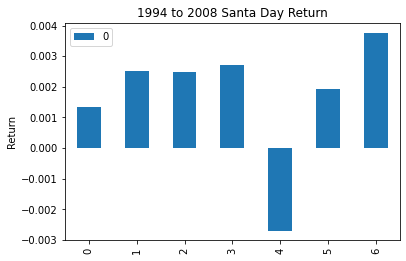

In [ ]:
day = [santadailythird.loc[santadailythird['Day'] == 1, 'Return on the S&P 500 Index'].mean(), 
       santadailythird.loc[santadailythird['Day'] == 2, 'Return on the S&P 500 Index'].mean(),
       santadailythird.loc[santadailythird['Day'] == 3, 'Return on the S&P 500 Index'].mean(),
       santadailythird.loc[santadailythird['Day'] == 4, 'Return on the S&P 500 Index'].mean(),
       santadailythird.loc[santadailythird['Day'] == 5, 'Return on the S&P 500 Index'].mean(),
       santadailythird.loc[santadailythird['Day'] == 6, 'Return on the S&P 500 Index'].mean(),
       santadailythird.loc[santadailythird['Day'] == 7, 'Return on the S&P 500 Index'].mean()]

dfday = pd.DataFrame(day)
dfday

# plot
ax = dfday.plot(kind='bar', figsize=(6, 4), title='1994 to 2008 Santa Day Return', ylabel='Return')

#SP 500 Fourth period (2009 to 2022)

In [ ]:
sp500dailyfourth = sp500daily.iloc[11708:,:]
sp500dailyfourth

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index
11709,2009,906.65,-0.030010
11710,2009,909.73,0.003397
11711,2009,890.35,-0.021303
11712,2009,870.26,-0.022564
11713,2009,871.79,0.001758
...,...,...,...
15238,2023,3999.09,0.003997
15239,2023,3990.97,-0.002030
15240,2023,3928.86,-0.015563
15241,2023,3898.85,-0.007638


In [ ]:
sp500dailyfourth.describe()

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index
count,3534.000000,3534.000000,3534.000000
mean,2015.533390,2304.673444,0.000479
std,4.047397,1026.827917,0.011736
min,2009.000000,676.530000,-0.119841
25%,2012.000000,1388.530000,-0.003971
50%,2016.000000,2089.220000,0.000687
75%,2019.000000,2896.735000,0.005815
max,2023.000000,4796.560000,0.093828


In [ ]:
santadailyfourth = santadaily.iloc[328:,:]
santadailyfourth

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index,Day
328,2008,927.45,-0.004668,7
329,2009,1126.48,0.005256,1
330,2009,1127.78,0.001154,2
331,2009,1126.20,-0.001401,3
332,2009,1126.42,0.000195,4
...,...,...,...,...
422,2022,3783.22,-0.012021,3
423,2022,3849.28,0.017461,4
424,2022,3839.50,-0.002541,5
425,2022,3824.14,-0.004001,6


In [ ]:
santadailyfourth.describe()

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index,Day
count,99.000000,99.000000,99.000000,99.000000
mean,2015.424242,2415.513737,0.000757,4.030303
std,4.100998,1079.456180,0.009595,2.022600
min,2008.000000,927.450000,-0.027112,1.000000
25%,2012.000000,1423.010000,-0.002808,2.000000
50%,2015.000000,2090.570000,0.000034,4.000000
75%,2019.000000,3232.815000,0.005192,6.000000
max,2022.000000,4796.560000,0.049594,7.000000


In [ ]:
sp500dailyfourth.skew()

Calendar Date                  0.001683
Level of the S&P 500 Index     0.626614
Return on the S&P 500 Index   -0.380451
dtype: float64

In [ ]:
sp500dailyfourth.kurt()

Calendar Date                  -1.207409
Level of the S&P 500 Index     -0.546093
Return on the S&P 500 Index    10.421234
dtype: float64

In [ ]:
santadailyfourth.skew()

Calendar Date                 -0.007134
Level of the S&P 500 Index     0.700403
Return on the S&P 500 Index    1.064814
Day                           -0.011893
dtype: float64

In [ ]:
santadailyfourth.kurt()

Calendar Date                 -1.201118
Level of the S&P 500 Index    -0.459086
Return on the S&P 500 Index    6.930342
Day                           -1.263523
dtype: float64

In [ ]:
print("The Stats summary of the first day of the Santa Claus Rally is")
print(santadailyfourth.loc[santadailyfourth['Day'] == 1, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the second day of the Santa Claus Rally is")
print(santadailyfourth.loc[santadailyfourth['Day'] == 2, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the third day of the Santa Claus Rally is")
print(santadailyfourth.loc[santadailyfourth['Day'] == 3, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the fourth day of the Santa Claus Rally is")
print(santadailyfourth.loc[santadailyfourth['Day'] == 4, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the fifth day of the Santa Claus Rally is")
print(santadailyfourth.loc[santadailyfourth['Day'] == 5, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the sixth day of the Santa Claus Rally is")
print(santadailyfourth.loc[santadailyfourth['Day'] == 6, 'Return on the S&P 500 Index'].describe())

print("The Stats summary of the seventh day of the Santa Claus Rally is")
print(santadailyfourth.loc[santadailyfourth['Day'] == 7, 'Return on the S&P 500 Index'].describe())

The Stats summary of the first day of the Santa Claus Rally is
count    14.000000
mean      0.000741
std       0.009175
min      -0.027112
25%      -0.000392
50%       0.000932
75%       0.004826
max       0.013839
Name: Return on the S&P 500 Index, dtype: float64
The Stats summary of the second day of the Santa Claus Rally is
count    14.000000
mean      0.004476
std       0.013497
min      -0.004787
25%      -0.001046
50%       0.000963
75%       0.004386
max       0.049594
Name: Return on the S&P 500 Index, dtype: float64
The Stats summary of the third day of the Santa Claus Rally is
count    14.000000
mean     -0.001053
std       0.006526
min      -0.012478
25%      -0.002021
50%      -0.000151
75%       0.000972
max       0.010630
Name: Return on the S&P 500 Index, dtype: float64
The Stats summary of the fourth day of the Santa Claus Rally is
count    14.000000
mean     -0.000258
std       0.007169
min      -0.011050
25%      -0.004414
50%      -0.000767
75%       0.001055
max    

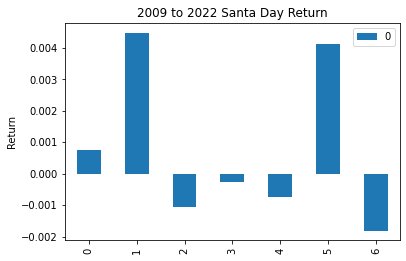

In [ ]:
day = [santadailyfourth.loc[santadailyfourth['Day'] == 1, 'Return on the S&P 500 Index'].mean(), 
       santadailyfourth.loc[santadailyfourth['Day'] == 2, 'Return on the S&P 500 Index'].mean(),
       santadailyfourth.loc[santadailyfourth['Day'] == 3, 'Return on the S&P 500 Index'].mean(),
       santadailyfourth.loc[santadailyfourth['Day'] == 4, 'Return on the S&P 500 Index'].mean(),
       santadailyfourth.loc[santadailyfourth['Day'] == 5, 'Return on the S&P 500 Index'].mean(),
       santadailyfourth.loc[santadailyfourth['Day'] == 6, 'Return on the S&P 500 Index'].mean(),
       santadailyfourth.loc[santadailyfourth['Day'] == 7, 'Return on the S&P 500 Index'].mean()]

dfday = pd.DataFrame(day)
dfday

# plot
ax = dfday.plot(kind='bar', figsize=(6, 4), title='2009 to 2022 Santa Day Return', ylabel='Return')

In [ ]:
sp500dailyfourth['Return on the S&P 500 Index']

11709   -0.030010
11710    0.003397
11711   -0.021303
11712   -0.022564
11713    0.001758
           ...   
15238    0.003997
15239   -0.002030
15240   -0.015563
15241   -0.007638
15242    0.018918
Name: Return on the S&P 500 Index, Length: 3534, dtype: float64

In [ ]:
santadailyfourthnew = santadailyfourth.iloc[1:,:]
santadailyfourthnew

,Calendar Date,Level of the S&P 500 Index,Return on the S&P 500 Index,Day
329,2009,1126.48,0.005256,1
330,2009,1127.78,0.001154,2
331,2009,1126.20,-0.001401,3
332,2009,1126.42,0.000195,4
333,2009,1115.10,-0.010050,5
...,...,...,...,...
422,2022,3783.22,-0.012021,3
423,2022,3849.28,0.017461,4
424,2022,3839.50,-0.002541,5
425,2022,3824.14,-0.004001,6


In [ ]:
SMLnew = SML.loc[SML['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05', 
                                '2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04',
                                '2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04',
                                '2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03',
                                '2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03',
                                '2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05',
                                '2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05',
                                '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04',
                                '2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03',
                                '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03',
                                '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
                                '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05',
                                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04',
                                '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])]
SMLnew

,Date,Close,Return
3289,2009-12-24,337.41,0.005154
3288,2009-12-28,337.09,-0.000948
3287,2009-12-29,337.12,0.000089
3286,2009-12-30,337.33,0.000623
3285,2009-12-31,332.63,-0.013933
...,...,...,...
15,2022-12-28,1137.71,-0.018928
14,2022-12-29,1162.74,0.022000
13,2022-12-30,1157.53,-0.004481
12,2023-01-03,1155.53,-0.001728


In [ ]:
MIDnew = MID.loc[MID['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05', 
                                '2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04',
                                '2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04',
                                '2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03',
                                '2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03',
                                '2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05',
                                '2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05',
                                '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04',
                                '2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03',
                                '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03',
                                '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
                                '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05',
                                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04',
                                '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])]
MIDnew

,Date,Close,Return
3289,2009-12-24,739.71,0.005109
3288,2009-12-28,739.44,-0.000365
3287,2009-12-29,737.84,-0.002164
3286,2009-12-30,736.17,-0.002263
3285,2009-12-31,726.67,-0.012905
...,...,...,...
15,2022-12-28,2394.71,-0.016861
14,2022-12-29,2441.17,0.019401
13,2022-12-30,2430.38,-0.004420
12,2023-01-03,2418.77,-0.004777


In [ ]:
stats.ttest_ind(MIDnew['Return'], santadailyfourthnew['Return on the S&P 500 Index'])

Ttest_indResult(statistic=-0.09087558796158347, pvalue=0.9276852085996578)

In [ ]:
stats.ttest_ind(SMLnew['Return'], MIDnew['Return'])

Ttest_indResult(statistic=0.015508396482786353, pvalue=0.9876425232089696)

In [ ]:
stats.ttest_ind(SMLnew['Return'], santadailyfourthnew['Return on the S&P 500 Index'])

Ttest_indResult(statistic=-0.06997101891367723, pvalue=0.9442887995162224)

#SP Small cap 600 Index

In [ ]:
SML=pd.read_csv('/content/gdrive/MyDrive/SML data.csv')

SML['Date'] = pd.to_datetime(SML['Date'])

SML = SML.iloc[::-1]

SML['Return'] = SML[' Close'].pct_change()
SML = SML.dropna()

SML

<ipython-input-162-1cf6d8059f61>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SML['Return'] = SML[' Close'].pct_change()


,Date,Close,Return
3536,2009-01-02,272.28,0.013210
3535,2009-01-05,270.20,-0.007639
3534,2009-01-06,274.79,0.016987
3533,2009-01-07,265.11,-0.035227
3532,2009-01-08,266.49,0.005205
...,...,...,...
4,2023-01-13,1238.88,0.005642
3,2023-01-17,1234.50,-0.003535
2,2023-01-18,1215.10,-0.015715
1,2023-01-19,1204.70,-0.008559


In [ ]:
SML.describe()

,Close,Return
count,3537.000000,3537.000000
mean,744.255816,0.000541
std,312.654185,0.014932
min,181.790000,-0.133089
25%,455.500000,-0.006655
50%,703.210000,0.000823
75%,951.470000,0.008177
max,1466.020000,0.090067


In [ ]:
#all the Santa Claus Days from 2009 to 2022
print(SML.loc[SML['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05', 
                                '2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04',
                                '2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04',
                                '2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03',
                                '2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03',
                                '2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05',
                                '2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05',
                                '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04',
                                '2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03',
                                '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03',
                                '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
                                '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05',
                                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04',
                                '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

             Close     Return
count    98.000000  98.000000
mean    786.348776   0.000709
std     309.247220   0.010932
min     332.630000  -0.023759
25%     474.770000  -0.004418
50%     748.260000   0.000192
75%    1020.905000   0.005114
max    1426.130000   0.047893


In [ ]:
print("2009 Santa Return")
print(SML.loc[SML['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05'])].describe())

print("2010 Santa Return")
print(SML.loc[SML['Date'].isin(['2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04'])].describe())

print("2011 Santa Return")
print(SML.loc[SML['Date'].isin(['2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04'])].describe())

print("2012 Santa Return")
print(SML.loc[SML['Date'].isin(['2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03'])].describe())

print("2013 Santa Return")
print(SML.loc[SML['Date'].isin(['2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03'])].describe())

print("2014 Santa Return")
print(SML.loc[SML['Date'].isin(['2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05'])].describe())

print("2015 Santa Return")
print(SML.loc[SML['Date'].isin(['2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05'])].describe())

print("2016 Santa Return")
print(SML.loc[SML['Date'].isin(['2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04'])].describe())

print("2017 Santa Return")
print(SML.loc[SML['Date'].isin(['2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03'])].describe())

print("2018 Santa Return")
print(SML.loc[SML['Date'].isin(['2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03'])].describe())

print("2019 Santa Return")
print(SML.loc[SML['Date'].isin(['2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03'])].describe())

print("2020 Santa Return")
print(SML.loc[SML['Date'].isin(['2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05'])].describe())

print("2021 Santa Return")
print(SML.loc[SML['Date'].isin(['2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04'])].describe())

print("2022 Santa Return")
print(SML.loc[SML['Date'].isin(['2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

2009 Santa Return
            Close    Return
count    7.000000  7.000000
mean   337.100000  0.001235
std      2.178929  0.010544
min    332.630000 -0.013933
25%    337.105000 -0.002182
50%    337.330000  0.000089
75%    337.945000  0.002888
max    339.640000  0.021074
2010 Santa Return
            Close    Return
count    7.000000  7.000000
mean   419.835714 -0.001178
std      2.913754  0.011958
min    415.730000 -0.018209
25%    418.285000 -0.006812
50%    420.420000 -0.000666
75%    421.080000  0.002215
max    423.970000  0.019821
2011 Santa Return
            Close    Return
count    7.000000  7.000000
mean   418.472857  0.000139
std      3.266123  0.013391
min    413.290000 -0.021266
25%    416.775000 -0.008319
50%    418.990000  0.003251
75%    420.605000  0.010006
max    422.270000  0.015612
2012 Santa Return
            Close    Return
count    7.000000  7.000000
mean   476.795714  0.004065
std      8.978715  0.013453
min    467.410000 -0.007487
25%    470.485000 -0.004765
50% 

In [ ]:
print("SML day 1 Santa Return")
print(SML.loc[SML['Date'].isin(['2009-12-24', '2010-12-27', '2011-12-23', '2012-12-24', '2013-12-24', '2014-12-24', '2015-12-24', '2016-12-23', 
                                '2017-12-22', '2018-12-24', '2019-12-24', '2020-12-24', '2021-12-27', '2022-12-23'])].describe())
print("SML day 2 Santa Return")
print(SML.loc[SML['Date'].isin(['2009-12-28', '2010-12-28', '2011-12-27', '2012-12-26', '2013-12-26', '2014-12-26', '2015-12-28', '2016-12-27', 
                                '2017-12-26', '2018-12-26', '2019-12-26', '2020-12-28', '2021-12-28', '2022-12-27'])].describe())
print("SML day 3 Santa Return")
print(SML.loc[SML['Date'].isin(['2009-12-29', '2010-12-29', '2011-12-28', '2012-12-27', '2013-12-27', '2014-12-29', '2015-12-29', '2016-12-28', 
                                '2017-12-27', '2018-12-27', '2019-12-27', '2020-12-29', '2021-12-29', '2022-12-28'])].describe())
print("SML day 4 Santa Return")
print(SML.loc[SML['Date'].isin(['2009-12-30', '2010-12-30', '2011-12-29', '2012-12-28', '2013-12-30', '2014-12-30', '2015-12-30', '2016-12-29', 
                                '2017-12-28', '2018-12-28', '2019-12-30', '2020-12-30', '2021-12-30', '2022-12-29'])].describe())
print("SML day 5 Santa Return")
print(SML.loc[SML['Date'].isin(['2009-12-31', '2010-12-31', '2011-12-30', '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-30', 
                                '2017-12-29', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-30'])].describe())
print("SML day 6 Santa Return")
print(SML.loc[SML['Date'].isin(['2010-01-04', '2011-01-03', '2012-01-03', '2013-01-02', '2014-01-02', '2015-01-02', '2016-01-04', '2017-01-03', 
                                '2018-01-02', '2019-01-02', '2020-01-02', '2021-01-04', '2022-01-03', '2023-01-03'])].describe())
print("SML day 7 Santa Return")
print(SML.loc[SML['Date'].isin(['2010-01-05', '2011-01-04', '2012-01-04', '2013-01-03', '2014-01-03', '2015-01-05', '2016-01-05', '2017-01-04', 
                                '2018-01-03', '2019-01-03', '2020-01-03', '2021-01-05', '2022-01-04', '2023-01-04'])].describe())

SML day 1 Santa Return
             Close     Return
count    14.000000  14.000000
mean    784.905000   0.001561
std     318.878917   0.007418
min     337.410000  -0.019454
25%     521.915000   0.000340
50%     744.470000   0.002700
75%    1003.352500   0.004747
max    1407.290000   0.014358
SML day 2 Santa Return
             Close     Return
count    14.000000  14.000000
mean    787.862143   0.003715
std     318.829631   0.013370
min     337.090000  -0.007487
25%     519.512500  -0.002270
50%     765.870000   0.000056
75%    1002.842500   0.004998
max    1403.000000   0.047893
SML day 3 Santa Return
             Close     Return
count    14.000000  14.000000
mean    784.568571  -0.003725
std     316.572724   0.009562
min     337.120000  -0.021266
25%     519.030000  -0.010164
50%     769.015000  -0.000585
75%     999.080000   0.003108
max    1408.810000   0.010377
SML day 4 Santa Return
             Close     Return
count    14.000000  14.000000
mean    786.835714   0.002254
std     

In [ ]:
SML['Date'] = pd.DatetimeIndex(SML['Date']).year
SML1 = SML

SML2 = SML1.groupby('Date').agg(['mean','std'])
SML2

Close                Return          
             mean         std      mean       std
Date                                             
2009   275.989365   38.205847  0.001092  0.022205
2010   358.359802   25.837184  0.000998  0.015028
2011   416.234246   27.237624  0.000194  0.020046
2012   451.579000   15.166757  0.000606  0.010377
2013   569.485556   49.896666  0.001366  0.008950
2014   660.867817   17.790702  0.000218  0.009588
2015   698.835357   21.548773 -0.000085  0.010017
2016   715.510992   62.986352  0.000939  0.011100
2017   863.980478   35.243150  0.000473  0.007900
2018   986.625578   62.334088 -0.000346  0.011185
2019   949.859524   32.467037  0.000804  0.010181
2020   886.781344  124.939193  0.000753  0.027830
2021  1340.577540   58.254168  0.000985  0.013502
2022  1221.747610   78.356792 -0.000634  0.016027
2023  1201.548462   28.405314  0.004328  0.011588

#SP Mid cap 400 index

In [ ]:
MID=pd.read_csv('/content/gdrive/MyDrive/MID data.csv')

MID['Date'] = pd.to_datetime(MID['Date'])

MID = MID.iloc[::-1]

MID['Return'] = MID[' Close'].pct_change()
MID = MID.dropna()

MID

<ipython-input-172-d330a61b7281>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MID['Return'] = MID[' Close'].pct_change()


,Date,Close,Return
3536,2009-01-02,551.34,0.024262
3535,2009-01-05,550.51,-0.001505
3534,2009-01-06,559.37,0.016094
3533,2009-01-07,541.15,-0.032572
3532,2009-01-08,545.37,0.007798
...,...,...,...
4,2023-01-13,2580.91,0.004882
3,2023-01-17,2575.61,-0.002054
2,2023-01-18,2543.36,-0.012521
1,2023-01-19,2516.89,-0.010407


In [ ]:
MID.describe()

,Close,Return
count,3537.000000,3537.000000
mean,1536.308052,0.000534
std,606.844281,0.013604
min,404.620000,-0.137597
25%,984.710000,-0.005479
50%,1486.620000,0.000839
75%,1925.310000,0.007301
max,2910.700000,0.107086


In [ ]:
#all the Santa Claus Days from 2009 to 2022
print(MID.loc[MID['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05', 
                                '2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04',
                                '2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04',
                                '2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03',
                                '2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03',
                                '2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05',
                                '2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05',
                                '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04',
                                '2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03',
                                '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03',
                                '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
                                '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05',
                                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04',
                                '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

             Close     Return
count    98.000000  98.000000
mean   1614.759694   0.000686
std     614.688785   0.009772
min     726.670000  -0.027275
25%    1020.370000  -0.003737
50%    1520.900000   0.000704
75%    2062.500000   0.004165
max    2865.540000   0.046178


In [ ]:
print("2009 Santa Return")
print(MID.loc[MID['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05'])].describe())

print("2010 Santa Return")
print(MID.loc[MID['Date'].isin(['2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04'])].describe())

print("2011 Santa Return")
print(MID.loc[MID['Date'].isin(['2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04'])].describe())

print("2012 Santa Return")
print(MID.loc[MID['Date'].isin(['2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03'])].describe())

print("2013 Santa Return")
print(MID.loc[MID['Date'].isin(['2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03'])].describe())

print("2014 Santa Return")
print(MID.loc[MID['Date'].isin(['2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05'])].describe())

print("2015 Santa Return")
print(MID.loc[MID['Date'].isin(['2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05'])].describe())

print("2016 Santa Return")
print(MID.loc[MID['Date'].isin(['2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04'])].describe())

print("2017 Santa Return")
print(MID.loc[MID['Date'].isin(['2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03'])].describe())

print("2018 Santa Return")
print(MID.loc[MID['Date'].isin(['2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03'])].describe())

print("2019 Santa Return")
print(MID.loc[MID['Date'].isin(['2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03'])].describe())

print("2020 Santa Return")
print(MID.loc[MID['Date'].isin(['2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05'])].describe())

print("2021 Santa Return")
print(MID.loc[MID['Date'].isin(['2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04'])].describe())

print("2022 Santa Return")
print(MID.loc[MID['Date'].isin(['2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

2009 Santa Return
            Close    Return
count    7.000000  7.000000
mean   736.870000  0.000838
std      4.695342  0.008701
min    726.670000 -0.012905
25%    737.005000 -0.002214
50%    738.150000 -0.000365
75%    739.575000  0.003882
max    740.110000  0.015798
2010 Santa Return
            Close    Return
count    7.000000  7.000000
mean   912.072857 -0.000135
std      3.985815  0.007855
min    907.250000 -0.011012
25%    909.920000 -0.004174
50%    911.750000  0.000679
75%    912.890000  0.001901
max    919.890000  0.013932
2011 Santa Return
            Close    Return
count    7.000000  7.000000
mean   882.764286  0.001012
std      5.821898  0.010596
min    871.340000 -0.018042
25%    881.160000 -0.003610
50%    884.910000  0.002757
75%    886.435000  0.008012
max    887.910000  0.013565
2012 Santa Return
             Close    Return
count     7.000000  7.000000
mean   1023.297143  0.003640
std      17.298891  0.012475
min    1004.330000 -0.008252
25%    1011.720000 -0.00453

In [ ]:
print("MID day 1 Santa Return")
print(MID.loc[MID['Date'].isin(['2009-12-24', '2010-12-27', '2011-12-23', '2012-12-24', '2013-12-24', '2014-12-24', '2015-12-24', '2016-12-23', 
                                '2017-12-22', '2018-12-24', '2019-12-24', '2020-12-24', '2021-12-27', '2022-12-23'])].describe())
print("MID day 2 Santa Return")
print(MID.loc[MID['Date'].isin(['2009-12-28', '2010-12-28', '2011-12-27', '2012-12-26', '2013-12-26', '2014-12-26', '2015-12-28', '2016-12-27', 
                                '2017-12-26', '2018-12-26', '2019-12-26', '2020-12-28', '2021-12-28', '2022-12-27'])].describe())
print("MID day 3 Santa Return")
print(MID.loc[MID['Date'].isin(['2009-12-29', '2010-12-29', '2011-12-28', '2012-12-27', '2013-12-27', '2014-12-29', '2015-12-29', '2016-12-28', 
                                '2017-12-27', '2018-12-27', '2019-12-27', '2020-12-29', '2021-12-29', '2022-12-28'])].describe())
print("MID day 4 Santa Return")
print(MID.loc[MID['Date'].isin(['2009-12-30', '2010-12-30', '2011-12-29', '2012-12-28', '2013-12-30', '2014-12-30', '2015-12-30', '2016-12-29', 
                                '2017-12-28', '2018-12-28', '2019-12-30', '2020-12-30', '2021-12-30', '2022-12-29'])].describe())
print("MID day 5 Santa Return")
print(MID.loc[MID['Date'].isin(['2009-12-31', '2010-12-31', '2011-12-30', '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-30', 
                                '2017-12-29', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-30'])].describe())
print("MID day 6 Santa Return")
print(MID.loc[MID['Date'].isin(['2010-01-04', '2011-01-03', '2012-01-03', '2013-01-02', '2014-01-02', '2015-01-02', '2016-01-04', '2017-01-03', 
                                '2018-01-02', '2019-01-02', '2020-01-02', '2021-01-04', '2022-01-03', '2023-01-03'])].describe())
print("MID day 7 Santa Return")
print(MID.loc[MID['Date'].isin(['2010-01-05', '2011-01-04', '2012-01-04', '2013-01-03', '2014-01-03', '2015-01-05', '2016-01-05', '2017-01-04', 
                                '2018-01-03', '2019-01-03', '2020-01-03', '2021-01-05', '2022-01-04', '2023-01-04'])].describe())

MID day 1 Santa Return
             Close     Return
count    14.000000  14.000000
mean   1611.512143   0.000904
std     633.934435   0.009039
min     739.710000  -0.027275
25%    1098.867500  -0.000120
50%    1515.375000   0.001634
75%    2022.165000   0.004863
max    2833.180000   0.013363
MID day 2 Santa Return
             Close     Return
count    14.000000  14.000000
mean   1616.897143   0.003260
std     634.193550   0.012730
min     739.440000  -0.008252
25%    1092.795000  -0.001278
50%    1553.840000   0.000431
75%    2026.930000   0.002861
max    2832.240000   0.046178
MID day 3 Santa Return
             Close     Return
count    14.000000  14.000000
mean   1612.362857  -0.002569
std     631.076955   0.008297
min     737.840000  -0.018042
25%    1092.707500  -0.008451
50%    1560.820000  -0.000263
75%    2023.540000   0.004008
max    2847.830000   0.007476
MID day 4 Santa Return
             Close     Return
count    14.000000  14.000000
mean   1616.073571   0.001636
std     

In [ ]:
MID['Date'] = pd.DatetimeIndex(MID['Date']).year
MID1 = MID

MID2 = MID1.groupby('Date').agg(['mean','std'])
MID2

Close                Return          
             mean         std      mean       std
Date                                             
2009   598.105040   86.384328  0.001399  0.020414
2010   786.220000   53.665846  0.000968  0.013227
2011   916.268333   64.247792  0.000037  0.018008
2012   966.708560   32.702916  0.000642  0.009590
2013  1195.843135   75.233994  0.001124  0.008316
2014  1385.410754   42.386256  0.000346  0.008190
2015  1473.095317   50.217228 -0.000106  0.009388
2016  1486.856944  106.993616  0.000730  0.009891
2017  1759.085259   61.737110  0.000556  0.006052
2018  1921.705976   89.039208 -0.000480  0.010138
2019  1918.474167   71.556278  0.000896  0.009031
2020  1878.527075  236.835367  0.000772  0.025545
2021  2675.525675  122.553542  0.000892  0.011304
2022  2496.368088  149.041394 -0.000492  0.016240
2023  2514.512308   54.519033  0.004022  0.011720

#SP 500 IT sector index

In [ ]:
INFT=pd.read_csv('/content/gdrive/MyDrive/S5INFT data.csv')

INFT['Date'] = pd.to_datetime(INFT['Date'])

INFT = INFT.iloc[::-1]

INFT['Return'] = INFT[' Close'].pct_change()
INFT = INFT.dropna()

INFT

,Date,Close,Return
3536,2009-01-02,241.74,0.042837
3535,2009-01-05,241.94,0.000827
3534,2009-01-06,249.27,0.030297
3533,2009-01-07,240.10,-0.036787
3532,2009-01-08,242.18,0.008663
...,...,...,...
4,2023-01-13,2276.98,0.003402
3,2023-01-17,2286.94,0.004374
2,2023-01-18,2257.62,-0.012821
1,2023-01-19,2231.84,-0.011419


In [ ]:
INFT.describe()

,Close,Return
count,3537.000000,3537.000000
mean,1045.057882,0.000749
std,748.583261,0.014205
min,199.620000,-0.139149
25%,465.450000,-0.005462
50%,717.970000,0.001101
75%,1374.820000,0.007537
max,3107.460000,0.119635


In [ ]:
#all the Santa Claus Days from 2009 to 2022
print(INFT.loc[INFT['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05', 
                                '2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04',
                                '2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04',
                                '2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03',
                                '2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03',
                                '2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05',
                                '2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05',
                                '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04',
                                '2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03',
                                '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03',
                                '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
                                '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05',
                                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04',
                                '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

             Close     Return
count    98.000000  98.000000
mean   1127.683878   0.000310
std     815.567809   0.012576
min     370.710000  -0.050678
25%     463.002500  -0.006068
50%     772.820000  -0.000196
75%    1613.547500   0.004533
max    3107.460000   0.060496


In [ ]:
print("2009 Santa Return")
print(INFT.loc[INFT['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05'])].describe())

print("2010 Santa Return")
print(INFT.loc[INFT['Date'].isin(['2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04'])].describe())

print("2011 Santa Return")
print(INFT.loc[INFT['Date'].isin(['2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04'])].describe())

print("2012 Santa Return")
print(INFT.loc[INFT['Date'].isin(['2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03'])].describe())

print("2013 Santa Return")
print(INFT.loc[INFT['Date'].isin(['2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03'])].describe())

print("2014 Santa Return")
print(INFT.loc[INFT['Date'].isin(['2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05'])].describe())

print("2015 Santa Return")
print(INFT.loc[INFT['Date'].isin(['2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05'])].describe())

print("2016 Santa Return")
print(INFT.loc[INFT['Date'].isin(['2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04'])].describe())

print("2017 Santa Return")
print(INFT.loc[INFT['Date'].isin(['2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03'])].describe())

print("2018 Santa Return")
print(INFT.loc[INFT['Date'].isin(['2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03'])].describe())

print("2019 Santa Return")
print(INFT.loc[INFT['Date'].isin(['2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03'])].describe())

print("2020 Santa Return")
print(INFT.loc[INFT['Date'].isin(['2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05'])].describe())

print("2021 Santa Return")
print(INFT.loc[INFT['Date'].isin(['2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04'])].describe())

print("2022 Santa Return")
print(INFT.loc[INFT['Date'].isin(['2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

2009 Santa Return
            Close    Return
count    7.000000  7.000000
mean   373.937143  0.002864
std      2.073288  0.008472
min    370.710000 -0.010939
25%    372.885000 -0.000668
50%    373.480000  0.002200
75%    375.570000  0.007306
max    376.460000  0.015511
2010 Santa Return
            Close    Return
count    7.000000  7.000000
mean   406.720000  0.001701
std      2.065946  0.004755
min    404.550000 -0.002072
25%    405.585000 -0.001071
50%    405.850000  0.001010
75%    407.775000  0.001610
max    409.920000  0.011890
2011 Santa Return
            Close    Return
count    7.000000  7.000000
mean   412.641429  0.003669
std      3.557679  0.009355
min    407.990000 -0.010454
25%    410.845000 -0.001579
50%    411.770000  0.002591
75%    414.565000  0.009934
max    417.910000  0.016832
2012 Santa Return
            Close    Return
count    7.000000  7.000000
mean   464.717143  0.003286
std      8.788812  0.016448
min    454.020000 -0.011582
25%    459.570000 -0.006834
50% 

In [ ]:
print("day 1 Santa Return")
print(INFT.loc[INFT['Date'].isin(['2009-12-24', '2010-12-27', '2011-12-23', '2012-12-24', '2013-12-24', '2014-12-24', '2015-12-24', '2016-12-23', 
                                '2017-12-22', '2018-12-24', '2019-12-24', '2020-12-24', '2021-12-27', '2022-12-23'])].describe())
print("day 2 Santa Return")
print(INFT.loc[INFT['Date'].isin(['2009-12-28', '2010-12-28', '2011-12-27', '2012-12-26', '2013-12-26', '2014-12-26', '2015-12-28', '2016-12-27', 
                                '2017-12-26', '2018-12-26', '2019-12-26', '2020-12-28', '2021-12-28', '2022-12-27'])].describe())
print("day 3 Santa Return")
print(INFT.loc[INFT['Date'].isin(['2009-12-29', '2010-12-29', '2011-12-28', '2012-12-27', '2013-12-27', '2014-12-29', '2015-12-29', '2016-12-28', 
                                '2017-12-27', '2018-12-27', '2019-12-27', '2020-12-29', '2021-12-29', '2022-12-28'])].describe())
print("day 4 Santa Return")
print(INFT.loc[INFT['Date'].isin(['2009-12-30', '2010-12-30', '2011-12-29', '2012-12-28', '2013-12-30', '2014-12-30', '2015-12-30', '2016-12-29', 
                                '2017-12-28', '2018-12-28', '2019-12-30', '2020-12-30', '2021-12-30', '2022-12-29'])].describe())
print("day 5 Santa Return")
print(INFT.loc[INFT['Date'].isin(['2009-12-31', '2010-12-31', '2011-12-30', '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-30', 
                                '2017-12-29', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-30'])].describe())
print("day 6 Santa Return")
print(INFT.loc[INFT['Date'].isin(['2010-01-04', '2011-01-03', '2012-01-03', '2013-01-02', '2014-01-02', '2015-01-02', '2016-01-04', '2017-01-03', 
                                '2018-01-02', '2019-01-02', '2020-01-02', '2021-01-04', '2022-01-03', '2023-01-03'])].describe())
print("day 7 Santa Return")
print(INFT.loc[INFT['Date'].isin(['2010-01-05', '2011-01-04', '2012-01-04', '2013-01-03', '2014-01-03', '2015-01-05', '2016-01-05', '2017-01-04', 
                                '2018-01-03', '2019-01-03', '2020-01-03', '2021-01-05', '2022-01-04', '2023-01-04'])].describe())

day 1 Santa Return
             Close     Return
count    14.000000  14.000000
mean   1126.620714   0.001572
std     847.622635   0.010676
min     372.660000  -0.027278
25%     492.377500  -0.000899
50%     773.665000   0.000929
75%    1481.312500   0.006110
max    3107.460000   0.021814
day 2 Santa Return
             Close     Return
count    14.000000  14.000000
mean   1130.852143   0.004724
std     844.931187   0.017115
min     373.480000  -0.009726
25%     490.620000  -0.004474
50%     775.715000   0.001756
75%    1488.262500   0.004375
max    3089.100000   0.060496
day 3 Santa Return
             Close     Return
count    14.000000  14.000000
mean   1127.887143  -0.001786
std     841.131269   0.007400
min     373.110000  -0.016436
25%     489.990000  -0.005145
50%     776.995000  -0.000996
75%    1488.982500   0.000941
max    3091.360000   0.013408
day 4 Santa Return
             Close     Return
count    14.000000  14.000000
mean   1128.677857  -0.000290
std     842.594058   0.0

#SP 500 Health Care sector Index

In [ ]:
HLTH=pd.read_csv('/content/gdrive/MyDrive/S5HLTH data.csv')

HLTH['Date'] = pd.to_datetime(HLTH['Date'])

HLTH = HLTH.iloc[::-1]

HLTH['Return'] = HLTH[' Close'].pct_change()
HLTH = HLTH.dropna()

HLTH

<ipython-input-79-5102da95c4e4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HLTH['Return'] = HLTH[' Close'].pct_change()


,Date,Close,Return
3536,2009-01-02,316.22,0.022010
3535,2009-01-05,313.30,-0.009234
3534,2009-01-06,308.76,-0.014491
3533,2009-01-07,305.79,-0.009619
3532,2009-01-08,307.48,0.005527
...,...,...,...
4,2023-01-13,1579.53,0.004726
3,2023-01-17,1571.65,-0.004989
2,2023-01-18,1549.37,-0.014176
1,2023-01-19,1552.99,0.002336


In [ ]:
HLTH.describe()

,Close,Return
count,3537.000000,3537.000000
mean,829.700319,0.000515
std,386.854342,0.010689
min,252.840000,-0.099922
25%,437.310000,-0.004361
50%,820.250000,0.000803
75%,1063.580000,0.006090
max,1664.580000,0.075879


In [ ]:
#all the Santa Claus Days from 2009 to 2022
print(HLTH.loc[HLTH['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05', 
                                '2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04',
                                '2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04',
                                '2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03',
                                '2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03',
                                '2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05',
                                '2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05',
                                '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04',
                                '2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03',
                                '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03',
                                '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
                                '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05',
                                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04',
                                '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

             Close     Return
count    98.000000  98.000000
mean    881.301633   0.000578
std     413.337343   0.009099
min     362.220000  -0.024885
25%     463.400000  -0.004040
50%     815.485000   0.000481
75%    1189.887500   0.005278
max    1650.430000   0.045430


In [ ]:
print("2009 Santa Return")
print(HLTH.loc[HLTH['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05'])].describe())

print("2010 Santa Return")
print(HLTH.loc[HLTH['Date'].isin(['2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04'])].describe())

print("2011 Santa Return")
print(HLTH.loc[HLTH['Date'].isin(['2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04'])].describe())

print("2012 Santa Return")
print(HLTH.loc[HLTH['Date'].isin(['2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03'])].describe())

print("2013 Santa Return")
print(HLTH.loc[HLTH['Date'].isin(['2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03'])].describe())

print("2014 Santa Return")
print(HLTH.loc[HLTH['Date'].isin(['2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05'])].describe())

print("2015 Santa Return")
print(HLTH.loc[HLTH['Date'].isin(['2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05'])].describe())

print("2016 Santa Return")
print(HLTH.loc[HLTH['Date'].isin(['2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04'])].describe())

print("2017 Santa Return")
print(HLTH.loc[HLTH['Date'].isin(['2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03'])].describe())

print("2018 Santa Return")
print(HLTH.loc[HLTH['Date'].isin(['2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03'])].describe())

print("2019 Santa Return")
print(HLTH.loc[HLTH['Date'].isin(['2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03'])].describe())

print("2020 Santa Return")
print(HLTH.loc[HLTH['Date'].isin(['2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05'])].describe())

print("2021 Santa Return")
print(HLTH.loc[HLTH['Date'].isin(['2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04'])].describe())

print("2022 Santa Return")
print(HLTH.loc[HLTH['Date'].isin(['2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

2009 Santa Return
            Close    Return
count    7.000000  7.000000
mean   365.921429 -0.000364
std      1.816539  0.007961
min    362.220000 -0.011516
25%    365.575000 -0.003771
50%    366.440000 -0.001145
75%    367.060000  0.001872
max    367.520000  0.013914
2010 Santa Return
            Close    Return
count    7.000000  7.000000
mean   366.642857  0.001146
std      1.844611  0.004578
min    364.780000 -0.002780
25%    365.565000 -0.001954
50%    366.010000  0.000301
75%    367.365000  0.002078
max    369.850000  0.010253
2011 Santa Return
            Close    Return
count    7.000000  7.000000
mean   403.548571  0.001711
std      2.555096  0.009195
min    399.330000 -0.011853
25%    402.515000 -0.004299
50%    403.680000  0.001090
75%    404.665000  0.008741
max    407.470000  0.013859
2012 Santa Return
            Close    Return
count    7.000000  7.000000
mean   464.822857  0.001835
std      5.279807  0.010075
min    457.390000 -0.010535
25%    462.525000 -0.003674
50% 

In [ ]:
print("day 1 Santa Return")
print(HLTH.loc[HLTH['Date'].isin(['2009-12-24', '2010-12-27', '2011-12-23', '2012-12-24', '2013-12-24', '2014-12-24', '2015-12-24', '2016-12-23', 
                                '2017-12-22', '2018-12-24', '2019-12-24', '2020-12-24', '2021-12-27', '2022-12-23'])].describe())
print("day 2 Santa Return")
print(HLTH.loc[HLTH['Date'].isin(['2009-12-28', '2010-12-28', '2011-12-27', '2012-12-26', '2013-12-26', '2014-12-26', '2015-12-28', '2016-12-27', 
                                '2017-12-26', '2018-12-26', '2019-12-26', '2020-12-28', '2021-12-28', '2022-12-27'])].describe())
print("day 3 Santa Return")
print(HLTH.loc[HLTH['Date'].isin(['2009-12-29', '2010-12-29', '2011-12-28', '2012-12-27', '2013-12-27', '2014-12-29', '2015-12-29', '2016-12-28', 
                                '2017-12-27', '2018-12-27', '2019-12-27', '2020-12-29', '2021-12-29', '2022-12-28'])].describe())
print("day 4 Santa Return")
print(HLTH.loc[HLTH['Date'].isin(['2009-12-30', '2010-12-30', '2011-12-29', '2012-12-28', '2013-12-30', '2014-12-30', '2015-12-30', '2016-12-29', 
                                '2017-12-28', '2018-12-28', '2019-12-30', '2020-12-30', '2021-12-30', '2022-12-29'])].describe())
print("day 5 Santa Return")
print(HLTH.loc[HLTH['Date'].isin(['2009-12-31', '2010-12-31', '2011-12-30', '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-30', 
                                '2017-12-29', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-30'])].describe())
print("day 6 Santa Return")
print(HLTH.loc[HLTH['Date'].isin(['2010-01-04', '2011-01-03', '2012-01-03', '2013-01-02', '2014-01-02', '2015-01-02', '2016-01-04', '2017-01-03', 
                                '2018-01-02', '2019-01-02', '2020-01-02', '2021-01-04', '2022-01-03', '2023-01-03'])].describe())
print("day 7 Santa Return")
print(HLTH.loc[HLTH['Date'].isin(['2010-01-05', '2011-01-04', '2012-01-04', '2013-01-03', '2014-01-03', '2015-01-05', '2016-01-05', '2017-01-04', 
                                '2018-01-03', '2019-01-03', '2020-01-03', '2021-01-05', '2022-01-04', '2023-01-04'])].describe())

day 1 Santa Return
             Close     Return
count    14.000000  14.000000
mean    878.135714   0.000061
std     426.826219   0.008481
min     365.900000  -0.024885
25%     508.075000  -0.002334
50%     821.040000   0.000208
75%    1134.890000   0.005574
max    1642.590000   0.010470
day 2 Santa Return
             Close     Return
count    14.000000  14.000000
mean    881.269286   0.003885
std     426.128323   0.012520
min     366.010000  -0.004581
25%     507.672500  -0.002288
50%     819.660000   0.000826
75%    1137.952500   0.003786
max    1637.970000   0.045430
day 3 Santa Return
             Close     Return
count    14.000000  14.000000
mean    882.572143   0.000658
std     427.406036   0.006576
min     366.210000  -0.011853
25%     507.070000  -0.001666
50%     823.850000   0.000592
75%    1141.135000   0.003923
max    1647.760000   0.012188
day 4 Santa Return
             Close     Return
count    14.000000  14.000000
mean    882.928571  -0.000269
std     429.615092   0.0

#SP 500 Consumer Discretionary sector Index

In [ ]:
COND=pd.read_csv('/content/gdrive/MyDrive/S5COND data.csv')

COND['Date'] = pd.to_datetime(COND['Date'])

COND = COND.iloc[::-1]

COND['Return'] = COND[' Close'].pct_change()
COND = COND.dropna()

COND

<ipython-input-84-97ee82948fa8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COND['Return'] = COND[' Close'].pct_change()


,Date,Close,Return
3535,2009-01-02,177.33,0.046750
3534,2009-01-05,177.37,0.000226
3533,2009-01-06,180.56,0.017985
3532,2009-01-07,174.21,-0.035168
3531,2009-01-08,174.78,0.003272
...,...,...,...
4,2023-01-13,1087.35,0.009741
3,2023-01-17,1088.11,0.000699
2,2023-01-18,1073.99,-0.012977
1,2023-01-19,1055.81,-0.016928


In [ ]:
COND.describe()

,Close,Return
count,3536.000000,3536.000000
mean,685.615020,0.000615
std,375.071271,0.013414
min,125.720000,-0.120825
25%,352.960000,-0.005184
50%,620.435000,0.001211
75%,929.367500,0.007180
max,1673.270000,0.086392


In [ ]:
#all the Santa Claus Days from 2009 to 2022
print(COND.loc[COND['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05', 
                                '2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04',
                                '2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04',
                                '2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03',
                                '2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03',
                                '2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05',
                                '2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05',
                                '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04',
                                '2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03',
                                '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03',
                                '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
                                '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05',
                                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04',
                                '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

             Close     Return
count    98.000000  98.000000
mean    718.941735   0.001466
std     387.763291   0.011094
min     235.070000  -0.021819
25%     375.460000  -0.004061
50%     639.945000   0.001235
75%     985.922500   0.006098
max    1655.170000   0.062781


In [ ]:
print("2009 Santa Return")
print(COND.loc[COND['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05'])].describe())

print("2010 Santa Return")
print(COND.loc[COND['Date'].isin(['2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04'])].describe())

print("2011 Santa Return")
print(COND.loc[COND['Date'].isin(['2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04'])].describe())

print("2012 Santa Return")
print(COND.loc[COND['Date'].isin(['2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03'])].describe())

print("2013 Santa Return")
print(COND.loc[COND['Date'].isin(['2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03'])].describe())

print("2014 Santa Return")
print(COND.loc[COND['Date'].isin(['2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05'])].describe())

print("2015 Santa Return")
print(COND.loc[COND['Date'].isin(['2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05'])].describe())

print("2016 Santa Return")
print(COND.loc[COND['Date'].isin(['2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04'])].describe())

print("2017 Santa Return")
print(COND.loc[COND['Date'].isin(['2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03'])].describe())

print("2018 Santa Return")
print(COND.loc[COND['Date'].isin(['2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03'])].describe())

print("2019 Santa Return")
print(COND.loc[COND['Date'].isin(['2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03'])].describe())

print("2020 Santa Return")
print(COND.loc[COND['Date'].isin(['2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05'])].describe())

print("2021 Santa Return")
print(COND.loc[COND['Date'].isin(['2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04'])].describe())

print("2022 Santa Return")
print(COND.loc[COND['Date'].isin(['2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

2009 Santa Return
            Close    Return
count    7.000000  7.000000
mean   237.254286 -0.000023
std      1.135413  0.005452
min    235.070000 -0.009815
25%    236.930000 -0.002203
50%    237.620000  0.001136
75%    237.920000  0.003504
max    238.390000  0.005913
2010 Santa Return
            Close    Return
count    7.000000  7.000000
mean   296.715714  0.000073
std      1.241221  0.005950
min    295.540000 -0.005916
25%    295.995000 -0.002645
50%    296.420000 -0.002260
75%    296.940000  0.000829
max    299.180000  0.012316
2011 Santa Return
            Close    Return
count    7.000000  7.000000
mean   310.264286  0.003268
std      2.120518  0.008904
min    307.010000 -0.011908
25%    309.340000 -0.001740
50%    310.270000  0.007192
75%    311.090000  0.009992
max    313.710000  0.011086
2012 Santa Return
            Close    Return
count    7.000000  7.000000
mean   376.111429  0.004017
std      6.313376  0.012552
min    368.670000 -0.009833
25%    371.770000 -0.003898
50% 

In [ ]:
print("day 1 Santa Return")
print(COND.loc[COND['Date'].isin(['2009-12-24', '2010-12-27', '2011-12-23', '2012-12-24', '2013-12-24', '2014-12-24', '2015-12-24', '2016-12-23', 
                                '2017-12-22', '2018-12-24', '2019-12-24', '2020-12-24', '2021-12-27', '2022-12-23'])].describe())
print("day 2 Santa Return")
print(COND.loc[COND['Date'].isin(['2009-12-28', '2010-12-28', '2011-12-27', '2012-12-26', '2013-12-26', '2014-12-26', '2015-12-28', '2016-12-27', 
                                '2017-12-26', '2018-12-26', '2019-12-26', '2020-12-28', '2021-12-28', '2022-12-27'])].describe())
print("day 3 Santa Return")
print(COND.loc[COND['Date'].isin(['2009-12-29', '2010-12-29', '2011-12-28', '2012-12-27', '2013-12-27', '2014-12-29', '2015-12-29', '2016-12-28', 
                                '2017-12-27', '2018-12-27', '2019-12-27', '2020-12-29', '2021-12-29', '2022-12-28'])].describe())
print("day 4 Santa Return")
print(COND.loc[COND['Date'].isin(['2009-12-30', '2010-12-30', '2011-12-29', '2012-12-28', '2013-12-30', '2014-12-30', '2015-12-30', '2016-12-29', 
                                '2017-12-28', '2018-12-28', '2019-12-30', '2020-12-30', '2021-12-30', '2022-12-29'])].describe())
print("day 5 Santa Return")
print(COND.loc[COND['Date'].isin(['2009-12-31', '2010-12-31', '2011-12-30', '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-30', 
                                '2017-12-29', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-30'])].describe())
print("day 6 Santa Return")
print(COND.loc[COND['Date'].isin(['2010-01-04', '2011-01-03', '2012-01-03', '2013-01-02', '2014-01-02', '2015-01-02', '2016-01-04', '2017-01-03', 
                                '2018-01-02', '2019-01-02', '2020-01-02', '2021-01-04', '2022-01-03', '2023-01-03'])].describe())
print("day 7 Santa Return")
print(COND.loc[COND['Date'].isin(['2010-01-05', '2011-01-04', '2012-01-04', '2013-01-03', '2014-01-03', '2015-01-05', '2016-01-05', '2017-01-04', 
                                '2018-01-03', '2019-01-03', '2020-01-03', '2021-01-05', '2022-01-04', '2023-01-04'])].describe())

day 1 Santa Return
             Close     Return
count    14.000000  14.000000
mean    713.305000   0.000239
std     396.334827   0.007299
min     237.950000  -0.020166
25%     412.560000  -0.002283
50%     640.060000   0.001218
75%     930.152500   0.002502
max    1617.450000   0.011086
day 2 Santa Return
             Close     Return
count    14.000000  14.000000
mean    718.449286   0.006188
std     398.835314   0.018188
min     237.890000  -0.016417
25%     410.637500   0.000103
50%     642.030000   0.002451
75%     941.092500   0.006237
max    1619.340000   0.062781
day 3 Santa Return
             Close     Return
count    14.000000  14.000000
mean    718.466429  -0.000148
std     399.168803   0.005991
min     238.390000  -0.011908
25%     410.477500  -0.003095
50%     643.480000   0.001224
75%     934.442500   0.002356
max    1621.560000   0.011263
day 4 Santa Return
             Close     Return
count    14.000000  14.000000
mean    719.379286   0.000763
std     399.728342   0.0

#SP 500 Industrials sector Index

In [ ]:
INDU=pd.read_csv('/content/gdrive/MyDrive/S5INDU data.csv')

INDU['Date'] = pd.to_datetime(INDU['Date'])

INDU = INDU.iloc[::-1]

INDU['Return'] = INDU[' Close'].pct_change()
INDU = INDU.dropna()

INDU

<ipython-input-89-ac4eb705c4c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INDU['Return'] = INDU[' Close'].pct_change()


,Date,Close,Return
3535,2009-01-02,215.83,0.041600
3534,2009-01-05,214.70,-0.005236
3533,2009-01-06,218.05,0.015603
3532,2009-01-07,209.69,-0.038340
3531,2009-01-08,210.52,0.003958
...,...,...,...
4,2023-01-13,867.03,-0.001233
3,2023-01-17,859.73,-0.008420
2,2023-01-18,843.87,-0.018448
1,2023-01-19,826.29,-0.020833


In [ ]:
INDU.describe()

,Close,Return
count,3536.000000,3536.000000
mean,503.152766,0.000485
std,194.553117,0.013383
min,132.830000,-0.114453
25%,321.017500,-0.005261
50%,483.580000,0.000822
75%,639.215000,0.006760
max,905.630000,0.127506


In [ ]:
#all the Santa Claus Days from 2009 to 2022
print(INDU.loc[INDU['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05', 
                                '2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04',
                                '2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04',
                                '2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03',
                                '2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03',
                                '2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05',
                                '2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05',
                                '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04',
                                '2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03',
                                '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03',
                                '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
                                '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05',
                                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04',
                                '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

            Close     Return
count   98.000000  98.000000
mean   532.176224   0.000879
std    198.958796   0.010636
min    242.990000  -0.031415
25%    328.202500  -0.003146
50%    500.675000   0.000612
75%    691.002500   0.005299
max    905.630000   0.048020


In [ ]:
print("2009 Santa Return")
print(INDU.loc[INDU['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05'])].describe())

print("2010 Santa Return")
print(INDU.loc[INDU['Date'].isin(['2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04'])].describe())

print("2011 Santa Return")
print(INDU.loc[INDU['Date'].isin(['2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04'])].describe())

print("2012 Santa Return")
print(INDU.loc[INDU['Date'].isin(['2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03'])].describe())

print("2013 Santa Return")
print(INDU.loc[INDU['Date'].isin(['2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03'])].describe())

print("2014 Santa Return")
print(INDU.loc[INDU['Date'].isin(['2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05'])].describe())

print("2015 Santa Return")
print(INDU.loc[INDU['Date'].isin(['2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05'])].describe())

print("2016 Santa Return")
print(INDU.loc[INDU['Date'].isin(['2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04'])].describe())

print("2017 Santa Return")
print(INDU.loc[INDU['Date'].isin(['2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03'])].describe())

print("2018 Santa Return")
print(INDU.loc[INDU['Date'].isin(['2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03'])].describe())

print("2019 Santa Return")
print(INDU.loc[INDU['Date'].isin(['2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03'])].describe())

print("2020 Santa Return")
print(INDU.loc[INDU['Date'].isin(['2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05'])].describe())

print("2021 Santa Return")
print(INDU.loc[INDU['Date'].isin(['2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04'])].describe())

print("2022 Santa Return")
print(INDU.loc[INDU['Date'].isin(['2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

2009 Santa Return
            Close    Return
count    7.000000  7.000000
mean   246.327143  0.001373
std      1.579870  0.009025
min    242.990000 -0.013118
25%    246.310000 -0.001945
50%    246.700000  0.001948
75%    246.995000  0.003856
max    247.990000  0.016955
2010 Santa Return
            Close    Return
count    7.000000  7.000000
mean   301.752857  0.001164
std      1.024658  0.002959
min    300.780000 -0.001759
25%    301.145000 -0.000562
50%    301.310000  0.000930
75%    302.285000  0.001397
max    303.320000  0.007306
2011 Santa Return
            Close    Return
count    7.000000  7.000000
mean   294.970000  0.003622
std      3.291205  0.011931
min    290.370000 -0.014526
25%    293.165000 -0.003755
50%    294.650000  0.004859
75%    296.790000  0.010849
max    299.860000  0.020833
2012 Santa Return
            Close    Return
count    7.000000  7.000000
mean   329.405714  0.003257
std      5.174491  0.012847
min    322.710000 -0.011669
25%    326.735000 -0.003075
50% 

In [ ]:
print("day 1 Santa Return")
print(INDU.loc[INDU['Date'].isin(['2009-12-24', '2010-12-27', '2011-12-23', '2012-12-24', '2013-12-24', '2014-12-24', '2015-12-24', '2016-12-23', 
                                '2017-12-22', '2018-12-24', '2019-12-24', '2020-12-24', '2021-12-27', '2022-12-23'])].describe())
print("day 2 Santa Return")
print(INDU.loc[INDU['Date'].isin(['2009-12-28', '2010-12-28', '2011-12-27', '2012-12-26', '2013-12-26', '2014-12-26', '2015-12-28', '2016-12-27', 
                                '2017-12-26', '2018-12-26', '2019-12-26', '2020-12-28', '2021-12-28', '2022-12-27'])].describe())
print("day 3 Santa Return")
print(INDU.loc[INDU['Date'].isin(['2009-12-29', '2010-12-29', '2011-12-28', '2012-12-27', '2013-12-27', '2014-12-29', '2015-12-29', '2016-12-28', 
                                '2017-12-27', '2018-12-27', '2019-12-27', '2020-12-29', '2021-12-29', '2022-12-28'])].describe())
print("day 4 Santa Return")
print(INDU.loc[INDU['Date'].isin(['2009-12-30', '2010-12-30', '2011-12-29', '2012-12-28', '2013-12-30', '2014-12-30', '2015-12-30', '2016-12-29', 
                                '2017-12-28', '2018-12-28', '2019-12-30', '2020-12-30', '2021-12-30', '2022-12-29'])].describe())
print("day 5 Santa Return")
print(INDU.loc[INDU['Date'].isin(['2009-12-31', '2010-12-31', '2011-12-30', '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-30', 
                                '2017-12-29', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-30'])].describe())
print("day 6 Santa Return")
print(INDU.loc[INDU['Date'].isin(['2010-01-04', '2011-01-03', '2012-01-03', '2013-01-02', '2014-01-02', '2015-01-02', '2016-01-04', '2017-01-03', 
                                '2018-01-02', '2019-01-02', '2020-01-02', '2021-01-04', '2022-01-03', '2023-01-03'])].describe())
print("day 7 Santa Return")
print(INDU.loc[INDU['Date'].isin(['2010-01-05', '2011-01-04', '2012-01-04', '2013-01-03', '2014-01-03', '2015-01-05', '2016-01-05', '2017-01-04', 
                                '2018-01-03', '2019-01-03', '2020-01-03', '2021-01-05', '2022-01-04', '2023-01-04'])].describe())

day 1 Santa Return
            Close     Return
count   14.000000  14.000000
mean   530.299286   0.000024
std    204.644327   0.009940
min    246.700000  -0.031415
25%    357.987500  -0.000512
50%    500.630000   0.000705
75%    676.665000   0.005078
max    888.530000   0.010497
day 2 Santa Return
            Close     Return
count   14.000000  14.000000
mean   532.873571   0.004421
std    205.711242   0.012848
min    246.400000  -0.003262
25%    357.955000  -0.000902
50%    512.825000   0.001144
75%    677.947500   0.003029
max    893.070000   0.048020
day 3 Santa Return
            Close     Return
count   14.000000  14.000000
mean   531.988571  -0.001390
std    204.608027   0.007635
min    246.880000  -0.014526
25%    357.515000  -0.005392
50%    516.170000  -0.000413
75%    678.160000   0.001870
max    894.530000   0.012447
day 4 Santa Return
            Close     Return
count   14.000000  14.000000
mean   531.928571  -0.000651
std    205.666041   0.006990
min    246.220000  -0.011

#SP 500 Consumer Staple sector Index

In [ ]:
CONS=pd.read_csv('/content/gdrive/MyDrive/S5CONS data.csv')

CONS['Date'] = pd.to_datetime(CONS['Date'])

CONS = CONS.iloc[::-1]

CONS['Return'] = CONS[' Close'].pct_change()
CONS = CONS.dropna()

CONS

<ipython-input-94-4fc5954caa3a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CONS['Return'] = CONS[' Close'].pct_change()


,Date,Close,Return
3536,2009-01-02,250.98,0.017514
3535,2009-01-05,250.37,-0.002430
3534,2009-01-06,247.76,-0.010425
3533,2009-01-07,244.93,-0.011422
3532,2009-01-08,241.86,-0.012534
...,...,...,...
4,2023-01-13,781.20,0.004604
3,2023-01-17,781.17,-0.000038
2,2023-01-18,760.45,-0.026524
1,2023-01-19,752.72,-0.010165


In [ ]:
CONS.describe()

,Close,Return
count,3537.000000,3537.000000
mean,497.949403,0.000359
std,156.918751,0.009021
min,199.800000,-0.092353
25%,356.430000,-0.003705
50%,512.690000,0.000476
75%,593.620000,0.004887
max,841.990000,0.084097


In [ ]:
#all the Santa Claus Days from 2009 to 2022
print(CONS.loc[CONS['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05', 
                                '2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04',
                                '2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04',
                                '2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03',
                                '2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03',
                                '2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05',
                                '2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05',
                                '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04',
                                '2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03',
                                '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03',
                                '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
                                '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05',
                                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04',
                                '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

            Close     Return
count   98.000000  98.000000
mean   521.385918  -0.000166
std    163.143464   0.007339
min    274.300000  -0.029789
25%    361.342500  -0.003596
50%    519.735000  -0.000257
75%    646.562500   0.002984
max    808.330000   0.028426


In [ ]:
print("2009 Santa Return")
print(CONS.loc[CONS['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05'])].describe())

print("2010 Santa Return")
print(CONS.loc[CONS['Date'].isin(['2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04'])].describe())

print("2011 Santa Return")
print(CONS.loc[CONS['Date'].isin(['2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04'])].describe())

print("2012 Santa Return")
print(CONS.loc[CONS['Date'].isin(['2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03'])].describe())

print("2013 Santa Return")
print(CONS.loc[CONS['Date'].isin(['2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03'])].describe())

print("2014 Santa Return")
print(CONS.loc[CONS['Date'].isin(['2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05'])].describe())

print("2015 Santa Return")
print(CONS.loc[CONS['Date'].isin(['2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05'])].describe())

print("2016 Santa Return")
print(CONS.loc[CONS['Date'].isin(['2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04'])].describe())

print("2017 Santa Return")
print(CONS.loc[CONS['Date'].isin(['2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03'])].describe())

print("2018 Santa Return")
print(CONS.loc[CONS['Date'].isin(['2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03'])].describe())

print("2019 Santa Return")
print(CONS.loc[CONS['Date'].isin(['2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03'])].describe())

print("2020 Santa Return")
print(CONS.loc[CONS['Date'].isin(['2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05'])].describe())

print("2021 Santa Return")
print(CONS.loc[CONS['Date'].isin(['2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04'])].describe())

print("2022 Santa Return")
print(CONS.loc[CONS['Date'].isin(['2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

2009 Santa Return
            Close    Return
count    7.000000  7.000000
mean   276.787143  0.000291
std      1.145014  0.006312
min    274.300000 -0.011353
25%    276.850000 -0.000938
50%    277.000000  0.001009
75%    277.420000  0.002207
max    277.670000  0.009843
2010 Santa Return
            Close    Return
count    7.000000  7.000000
mean   303.557143 -0.000731
std      0.361327  0.002392
min    303.000000 -0.004236
25%    303.365000 -0.002269
50%    303.580000 -0.000099
75%    303.735000  0.000989
max    304.120000  0.001779
2011 Santa Return
            Close    Return
count    7.000000  7.000000
mean   336.072857  0.000454
std      0.980539  0.005631
min    334.970000 -0.005601
25%    335.325000 -0.003596
50%    335.680000 -0.000415
75%    336.890000  0.003670
max    337.430000  0.009044
2012 Santa Return
            Close    Return
count    7.000000  7.000000
mean   362.924286  0.001956
std      4.991830  0.012750
min    356.830000 -0.009796
25%    360.200000 -0.005875
50% 

In [ ]:
print("day 1 Santa Return")
print(CONS.loc[CONS['Date'].isin(['2009-12-24', '2010-12-27', '2011-12-23', '2012-12-24', '2013-12-24', '2014-12-24', '2015-12-24', '2016-12-23', 
                                '2017-12-22', '2018-12-24', '2019-12-24', '2020-12-24', '2021-12-27', '2022-12-23'])].describe())
print("day 2 Santa Return")
print(CONS.loc[CONS['Date'].isin(['2009-12-28', '2010-12-28', '2011-12-27', '2012-12-26', '2013-12-26', '2014-12-26', '2015-12-28', '2016-12-27', 
                                '2017-12-26', '2018-12-26', '2019-12-26', '2020-12-28', '2021-12-28', '2022-12-27'])].describe())
print("day 3 Santa Return")
print(CONS.loc[CONS['Date'].isin(['2009-12-29', '2010-12-29', '2011-12-28', '2012-12-27', '2013-12-27', '2014-12-29', '2015-12-29', '2016-12-28', 
                                '2017-12-27', '2018-12-27', '2019-12-27', '2020-12-29', '2021-12-29', '2022-12-28'])].describe())
print("day 4 Santa Return")
print(CONS.loc[CONS['Date'].isin(['2009-12-30', '2010-12-30', '2011-12-29', '2012-12-28', '2013-12-30', '2014-12-30', '2015-12-30', '2016-12-29', 
                                '2017-12-28', '2018-12-28', '2019-12-30', '2020-12-30', '2021-12-30', '2022-12-29'])].describe())
print("day 5 Santa Return")
print(CONS.loc[CONS['Date'].isin(['2009-12-31', '2010-12-31', '2011-12-30', '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-30', 
                                '2017-12-29', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-30'])].describe())
print("day 6 Santa Return")
print(CONS.loc[CONS['Date'].isin(['2010-01-04', '2011-01-03', '2012-01-03', '2013-01-02', '2014-01-02', '2015-01-02', '2016-01-04', '2017-01-03', 
                                '2018-01-02', '2019-01-02', '2020-01-02', '2021-01-04', '2022-01-03', '2023-01-03'])].describe())
print("day 7 Santa Return")
print(CONS.loc[CONS['Date'].isin(['2010-01-05', '2011-01-04', '2012-01-04', '2013-01-03', '2014-01-03', '2015-01-05', '2016-01-05', '2017-01-04', 
                                '2018-01-03', '2019-01-03', '2020-01-03', '2021-01-05', '2022-01-04', '2023-01-04'])].describe())

day 1 Santa Return
            Close     Return
count   14.000000  14.000000
mean   520.450000  -0.000360
std    167.688991   0.009484
min    277.000000  -0.029789
25%    381.900000  -0.001668
50%    515.485000   0.001382
75%    631.705000   0.003784
max    793.220000   0.010317
day 2 Santa Return
            Close     Return
count   14.000000  14.000000
mean   522.657143   0.003639
std    169.253285   0.008107
min    277.390000  -0.008236
25%    380.137500   0.000480
50%    518.200000   0.001764
75%    632.747500   0.004607
max    798.180000   0.028426
day 3 Santa Return
            Close     Return
count   14.000000  14.000000
mean   522.581429   0.000110
std    168.549298   0.005951
min    277.670000  -0.012577
25%    380.655000  -0.003302
50%    523.080000   0.000410
75%    634.672500   0.003619
max    801.540000   0.010217
day 4 Santa Return
            Close     Return
count   14.000000  14.000000
mean   522.057143  -0.000958
std    168.394797   0.004349
min    277.450000  -0.009

#SP 500 Energy sector Index

In [ ]:
ENRS=pd.read_csv('/content/gdrive/MyDrive/S5ENRS data.csv')

ENRS['Date'] = pd.to_datetime(ENRS['Date'])

ENRS = ENRS.iloc[::-1]

ENRS['Return'] = ENRS[' Close'].pct_change()
ENRS = ENRS.dropna()

ENRS

<ipython-input-99-278d2f9c30a8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ENRS['Return'] = ENRS[' Close'].pct_change()


,Date,Close,Return
3535,2009-01-02,403.12,0.043406
3534,2009-01-05,408.61,0.013619
3533,2009-01-06,410.65,0.004993
3532,2009-01-07,394.86,-0.038451
3531,2009-01-08,399.44,0.011599
...,...,...,...
4,2023-01-13,690.21,0.001378
3,2023-01-17,691.07,0.001246
2,2023-01-18,678.87,-0.017654
1,2023-01-19,686.38,0.011063


In [ ]:
ENRS.describe()

,Close,Return
count,3536.000000,3536.000000
mean,494.849811,0.000327
std,102.526798,0.017893
min,179.940000,-0.200822
25%,429.310000,-0.007903
50%,501.485000,0.000382
75%,562.387500,0.008789
max,737.090000,0.163122


In [ ]:
#all the Santa Claus Days from 2009 to 2022
print(ENRS.loc[ENRS['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05', 
                                '2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04',
                                '2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04',
                                '2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03',
                                '2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03',
                                '2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05',
                                '2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05',
                                '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04',
                                '2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03',
                                '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03',
                                '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
                                '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05',
                                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04',
                                '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

            Close     Return
count   98.000000  98.000000
mean   503.211224   0.001930
std     95.742728   0.015070
min    283.930000  -0.040163
25%    437.842500  -0.006208
50%    513.580000   0.000505
75%    558.820000   0.007992
max    675.960000   0.062426


In [ ]:
print("2009 Santa Return")
print(ENRS.loc[ENRS['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05'])].describe())

print("2010 Santa Return")
print(ENRS.loc[ENRS['Date'].isin(['2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04'])].describe())

print("2011 Santa Return")
print(ENRS.loc[ENRS['Date'].isin(['2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04'])].describe())

print("2012 Santa Return")
print(ENRS.loc[ENRS['Date'].isin(['2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03'])].describe())

print("2013 Santa Return")
print(ENRS.loc[ENRS['Date'].isin(['2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03'])].describe())

print("2014 Santa Return")
print(ENRS.loc[ENRS['Date'].isin(['2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05'])].describe())

print("2015 Santa Return")
print(ENRS.loc[ENRS['Date'].isin(['2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05'])].describe())

print("2016 Santa Return")
print(ENRS.loc[ENRS['Date'].isin(['2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04'])].describe())

print("2017 Santa Return")
print(ENRS.loc[ENRS['Date'].isin(['2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03'])].describe())

print("2018 Santa Return")
print(ENRS.loc[ENRS['Date'].isin(['2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03'])].describe())

print("2019 Santa Return")
print(ENRS.loc[ENRS['Date'].isin(['2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03'])].describe())

print("2020 Santa Return")
print(ENRS.loc[ENRS['Date'].isin(['2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05'])].describe())

print("2021 Santa Return")
print(ENRS.loc[ENRS['Date'].isin(['2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04'])].describe())

print("2022 Santa Return")
print(ENRS.loc[ENRS['Date'].isin(['2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

2009 Santa Return
            Close    Return
count    7.000000  7.000000
mean   436.630000  0.004133
std      5.409171  0.012183
min    429.950000 -0.008578
25%    433.575000 -0.003161
50%    435.200000  0.002826
75%    439.255000  0.006394
max    445.600000  0.028213
2010 Santa Return
            Close    Return
count    7.000000  7.000000
mean   506.080000  0.001834
std      3.773562  0.005791
min    500.160000 -0.006119
25%    504.370000 -0.002020
50%    506.750000  0.001145
75%    507.685000  0.006200
max    511.540000  0.009452
2011 Santa Return
            Close    Return
count    7.000000  7.000000
mean   525.364286  0.004114
std      7.162018  0.013672
min    515.620000 -0.018782
25%    521.215000 -0.000047
50%    524.470000  0.001945
75%    529.935000  0.009835
max    535.160000  0.026056
2012 Santa Return
            Close    Return
count    7.000000  7.000000
mean   534.710000  0.001896
std      8.147611  0.014937
min    522.030000 -0.017688
25%    531.795000 -0.005469
50% 

In [ ]:
print("day 1 Santa Return")
print(ENRS.loc[ENRS['Date'].isin(['2009-12-24', '2010-12-27', '2011-12-23', '2012-12-24', '2013-12-24', '2014-12-24', '2015-12-24', '2016-12-23', 
                                '2017-12-22', '2018-12-24', '2019-12-24', '2020-12-24', '2021-12-27', '2022-12-23'])].describe())
print("day 2 Santa Return")
print(ENRS.loc[ENRS['Date'].isin(['2009-12-28', '2010-12-28', '2011-12-27', '2012-12-26', '2013-12-26', '2014-12-26', '2015-12-28', '2016-12-27', 
                                '2017-12-26', '2018-12-26', '2019-12-26', '2020-12-28', '2021-12-28', '2022-12-27'])].describe())
print("day 3 Santa Return")
print(ENRS.loc[ENRS['Date'].isin(['2009-12-29', '2010-12-29', '2011-12-28', '2012-12-27', '2013-12-27', '2014-12-29', '2015-12-29', '2016-12-28', 
                                '2017-12-27', '2018-12-27', '2019-12-27', '2020-12-29', '2021-12-29', '2022-12-28'])].describe())
print("day 4 Santa Return")
print(ENRS.loc[ENRS['Date'].isin(['2009-12-30', '2010-12-30', '2011-12-29', '2012-12-28', '2013-12-30', '2014-12-30', '2015-12-30', '2016-12-29', 
                                '2017-12-28', '2018-12-28', '2019-12-30', '2020-12-30', '2021-12-30', '2022-12-29'])].describe())
print("day 5 Santa Return")
print(ENRS.loc[ENRS['Date'].isin(['2009-12-31', '2010-12-31', '2011-12-30', '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-30', 
                                '2017-12-29', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-30'])].describe())
print("day 6 Santa Return")
print(ENRS.loc[ENRS['Date'].isin(['2010-01-04', '2011-01-03', '2012-01-03', '2013-01-02', '2014-01-02', '2015-01-02', '2016-01-04', '2017-01-03', 
                                '2018-01-02', '2019-01-02', '2020-01-02', '2021-01-04', '2022-01-03', '2023-01-03'])].describe())
print("day 7 Santa Return")
print(ENRS.loc[ENRS['Date'].isin(['2010-01-05', '2011-01-04', '2012-01-04', '2013-01-03', '2014-01-03', '2015-01-05', '2016-01-05', '2017-01-04', 
                                '2018-01-03', '2019-01-03', '2020-01-03', '2021-01-05', '2022-01-04', '2023-01-04'])].describe())

day 1 Santa Return
            Close     Return
count   14.000000  14.000000
mean   501.527857  -0.000110
std    100.928192   0.016420
min    287.380000  -0.040163
25%    440.665000  -0.006982
50%    512.315000  -0.001236
75%    554.707500   0.005977
max    668.330000   0.031628
day 2 Santa Return
            Close     Return
count   14.000000  14.000000
mean   504.067143   0.005242
std    101.395273   0.017947
min    285.820000  -0.017921
25%    439.935000  -0.001032
50%    513.925000   0.002148
75%    556.347500   0.007284
max    675.960000   0.062426
day 3 Santa Return
            Close     Return
count   14.000000  14.000000
mean   502.070714  -0.003635
std     99.952330   0.009215
min    283.930000  -0.022205
25%    438.505000  -0.006723
50%    511.000000  -0.003954
75%    551.792500   0.004297
max    660.950000   0.008002
day 4 Santa Return
            Close     Return
count   14.000000  14.000000
mean   500.897143  -0.002031
std     99.704017   0.009617
min    288.480000  -0.017

#SP 500 Utility sector Index

In [ ]:
UTIL= pd.read_csv('/content/gdrive/MyDrive/S5UTIL data.csv')

UTIL['Date'] = pd.to_datetime(UTIL['Date'])

UTIL = UTIL.iloc[::-1]

UTIL['Return'] = UTIL[' Close'].pct_change()
UTIL = UTIL.dropna()

UTIL

,Date,Close,Return
3536,2009-01-02,151.29,0.022713
3535,2009-01-05,152.38,0.007205
3534,2009-01-06,151.16,-0.008006
3533,2009-01-07,148.64,-0.016671
3532,2009-01-08,149.20,0.003767
...,...,...,...
4,2023-01-13,362.63,-0.004393
3,2023-01-17,362.18,-0.001241
2,2023-01-18,353.46,-0.024076
1,2023-01-19,349.93,-0.009987


In [ ]:
UTIL.describe()

,Close,Return
count,3537.000000,3537.000000
mean,240.258422,0.000310
std,67.598883,0.011429
min,113.810000,-0.115430
25%,180.320000,-0.005286
50%,235.810000,0.000859
75%,294.220000,0.006189
max,394.810000,0.131115


In [ ]:
#all the Santa Claus Days from 2009 to 2022
print(UTIL.loc[UTIL['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05', 
                                '2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04',
                                '2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04',
                                '2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03',
                                '2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03',
                                '2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05',
                                '2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05',
                                '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04',
                                '2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03',
                                '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03',
                                '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
                                '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05',
                                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04',
                                '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

            Close     Return
count   98.000000  98.000000
mean   248.167959  -0.000491
std     68.506976   0.009518
min    156.510000  -0.042654
25%    182.792500  -0.004654
50%    246.460000   0.000741
75%    312.282500   0.005033
max    363.710000   0.018125


In [ ]:
print("2009 Santa Return")
print(UTIL.loc[UTIL['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05'])].describe())

print("2010 Santa Return")
print(UTIL.loc[UTIL['Date'].isin(['2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04'])].describe())

print("2011 Santa Return")
print(UTIL.loc[UTIL['Date'].isin(['2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04'])].describe())

print("2012 Santa Return")
print(UTIL.loc[UTIL['Date'].isin(['2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03'])].describe())

print("2013 Santa Return")
print(UTIL.loc[UTIL['Date'].isin(['2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03'])].describe())

print("2014 Santa Return")
print(UTIL.loc[UTIL['Date'].isin(['2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05'])].describe())

print("2015 Santa Return")
print(UTIL.loc[UTIL['Date'].isin(['2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05'])].describe())

print("2016 Santa Return")
print(UTIL.loc[UTIL['Date'].isin(['2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04'])].describe())

print("2017 Santa Return")
print(UTIL.loc[UTIL['Date'].isin(['2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03'])].describe())

print("2018 Santa Return")
print(UTIL.loc[UTIL['Date'].isin(['2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03'])].describe())

print("2019 Santa Return")
print(UTIL.loc[UTIL['Date'].isin(['2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03'])].describe())

print("2020 Santa Return")
print(UTIL.loc[UTIL['Date'].isin(['2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05'])].describe())

print("2021 Santa Return")
print(UTIL.loc[UTIL['Date'].isin(['2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04'])].describe())

print("2022 Santa Return")
print(UTIL.loc[UTIL['Date'].isin(['2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

2009 Santa Return
            Close    Return
count    7.000000  7.000000
mean   159.191429 -0.002350
std      1.583113  0.007989
min    156.510000 -0.015209
25%    158.160000 -0.006308
50%    160.260000  0.000686
75%    160.375000  0.001825
max    160.500000  0.007038
2010 Santa Return
            Close    Return
count    7.000000  7.000000
mean   159.882857  0.001074
std      0.562693  0.003110
min    159.340000 -0.002562
25%    159.500000 -0.001127
50%    159.680000 -0.000063
75%    160.110000  0.003625
max    160.940000  0.005146
2011 Santa Return
            Close    Return
count    7.000000  7.000000
mean   182.122857 -0.001760
std      1.998455  0.009566
min    178.880000 -0.017051
25%    181.130000 -0.006250
50%    182.730000 -0.005449
75%    183.405000  0.007370
max    184.180000  0.007935
2012 Santa Return
            Close    Return
count    7.000000  7.000000
mean   178.281429  0.001058
std      2.095586  0.010899
min    175.220000 -0.009889
25%    177.165000 -0.006279
50% 

In [ ]:
print("day 1 Santa Return")
print(UTIL.loc[UTIL['Date'].isin(['2009-12-24', '2010-12-27', '2011-12-23', '2012-12-24', '2013-12-24', '2014-12-24', '2015-12-24', '2016-12-23', 
                                '2017-12-22', '2018-12-24', '2019-12-24', '2020-12-24', '2021-12-27', '2022-12-23'])].describe())
print("day 2 Santa Return")
print(UTIL.loc[UTIL['Date'].isin(['2009-12-28', '2010-12-28', '2011-12-27', '2012-12-26', '2013-12-26', '2014-12-26', '2015-12-28', '2016-12-27', 
                                '2017-12-26', '2018-12-26', '2019-12-26', '2020-12-28', '2021-12-28', '2022-12-27'])].describe())
print("day 3 Santa Return")
print(UTIL.loc[UTIL['Date'].isin(['2009-12-29', '2010-12-29', '2011-12-28', '2012-12-27', '2013-12-27', '2014-12-29', '2015-12-29', '2016-12-28', 
                                '2017-12-27', '2018-12-27', '2019-12-27', '2020-12-29', '2021-12-29', '2022-12-28'])].describe())
print("day 4 Santa Return")
print(UTIL.loc[UTIL['Date'].isin(['2009-12-30', '2010-12-30', '2011-12-29', '2012-12-28', '2013-12-30', '2014-12-30', '2015-12-30', '2016-12-29', 
                                '2017-12-28', '2018-12-28', '2019-12-30', '2020-12-30', '2021-12-30', '2022-12-29'])].describe())
print("day 5 Santa Return")
print(UTIL.loc[UTIL['Date'].isin(['2009-12-31', '2010-12-31', '2011-12-30', '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-30', 
                                '2017-12-29', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-30'])].describe())
print("day 6 Santa Return")
print(UTIL.loc[UTIL['Date'].isin(['2010-01-04', '2011-01-03', '2012-01-03', '2013-01-02', '2014-01-02', '2015-01-02', '2016-01-04', '2017-01-03', 
                                '2018-01-02', '2019-01-02', '2020-01-02', '2021-01-04', '2022-01-03', '2023-01-03'])].describe())
print("day 7 Santa Return")
print(UTIL.loc[UTIL['Date'].isin(['2010-01-05', '2011-01-04', '2012-01-04', '2013-01-03', '2014-01-03', '2015-01-05', '2016-01-05', '2017-01-04', 
                                '2018-01-03', '2019-01-03', '2020-01-03', '2021-01-05', '2022-01-04', '2023-01-04'])].describe())

day 1 Santa Return
            Close     Return
count   14.000000  14.000000
mean   247.749286   0.000931
std     69.781877   0.013704
min    159.680000  -0.042654
25%    184.962500  -0.000302
50%    245.745000   0.002451
75%    300.122500   0.006917
max    360.800000   0.018054
day 2 Santa Return
            Close     Return
count   14.000000  14.000000
mean   248.687143   0.003160
std     70.643121   0.006846
min    160.060000  -0.009162
25%    185.837500   0.000344
50%    247.215000   0.002140
75%    301.025000   0.007425
max    363.030000   0.015629
day 3 Santa Return
            Close     Return
count   14.000000  14.000000
mean   248.841429   0.000485
std     70.681287   0.006285
min    159.650000  -0.009785
25%    185.102500  -0.002471
50%    247.380000   0.000682
75%    301.485000   0.004810
max    361.290000   0.011128
day 4 Santa Return
            Close     Return
count   14.000000  14.000000
mean   249.120000   0.000666
std     71.273775   0.008193
min    159.350000  -0.020

#SP 500 Financials sector Index

In [ ]:
FINL=pd.read_csv('/content/gdrive/MyDrive/S5FINL data.csv')

FINL['Date'] = pd.to_datetime(FINL['Date'])

FINL = FINL.iloc[::-1]

FINL['Return'] = FINL[' Close'].pct_change()
FINL = FINL.dropna()

FINL

,Date,Close,Return
3536,2009-01-02,171.36,0.015226
3535,2009-01-05,167.15,-0.024568
3534,2009-01-06,170.39,0.019384
3533,2009-01-07,161.64,-0.051353
3532,2009-01-08,161.31,-0.002042
...,...,...,...
4,2023-01-13,600.66,0.007092
3,2023-01-17,596.59,-0.006776
2,2023-01-18,585.64,-0.018354
1,2023-01-19,578.61,-0.012004


In [ ]:
FINL.describe()

,Close,Return
count,3537.000000,3537.000000
mean,351.709765,0.000516
std,140.892273,0.018098
min,81.740000,-0.167333
25%,216.660000,-0.006741
50%,324.870000,0.000645
75%,454.010000,0.007974
max,688.850000,0.177419


In [ ]:
#all the Santa Claus Days from 2009 to 2022
print(FINL.loc[FINL['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05', 
                                '2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04',
                                '2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04',
                                '2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03',
                                '2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03',
                                '2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05',
                                '2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05',
                                '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04',
                                '2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03',
                                '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03',
                                '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
                                '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05',
                                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04',
                                '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

            Close     Return
count   98.000000  98.000000
mean   373.499286   0.001771
std    143.973855   0.010757
min    173.530000  -0.023484
25%    221.150000  -0.003409
50%    354.165000   0.000274
75%    483.792500   0.006374
max    675.260000   0.046479


In [ ]:
print("2009 Santa Return")
print(FINL.loc[FINL['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05'])].describe())

print("2010 Santa Return")
print(FINL.loc[FINL['Date'].isin(['2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04'])].describe())

print("2011 Santa Return")
print(FINL.loc[FINL['Date'].isin(['2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04'])].describe())

print("2012 Santa Return")
print(FINL.loc[FINL['Date'].isin(['2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03'])].describe())

print("2013 Santa Return")
print(FINL.loc[FINL['Date'].isin(['2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03'])].describe())

print("2014 Santa Return")
print(FINL.loc[FINL['Date'].isin(['2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05'])].describe())

print("2015 Santa Return")
print(FINL.loc[FINL['Date'].isin(['2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05'])].describe())

print("2016 Santa Return")
print(FINL.loc[FINL['Date'].isin(['2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04'])].describe())

print("2017 Santa Return")
print(FINL.loc[FINL['Date'].isin(['2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03'])].describe())

print("2018 Santa Return")
print(FINL.loc[FINL['Date'].isin(['2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03'])].describe())

print("2019 Santa Return")
print(FINL.loc[FINL['Date'].isin(['2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03'])].describe())

print("2020 Santa Return")
print(FINL.loc[FINL['Date'].isin(['2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05'])].describe())

print("2021 Santa Return")
print(FINL.loc[FINL['Date'].isin(['2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04'])].describe())

print("2022 Santa Return")
print(FINL.loc[FINL['Date'].isin(['2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

2009 Santa Return
            Close    Return
count    7.000000  7.000000
mean   196.072857  0.005156
std      2.592687  0.010377
min    193.780000 -0.004201
25%    194.425000 -0.003383
50%    195.170000  0.000772
75%    196.780000  0.012796
max    201.150000  0.020694
2010 Santa Return
            Close    Return
count    7.000000  7.000000
mean   216.347143  0.003723
std      2.178874  0.009604
min    214.320000 -0.003534
25%    214.925000 -0.002644
50%    215.650000  0.000278
75%    217.450000  0.005801
max    219.710000  0.023001
2011 Santa Return
            Close    Return
count    7.000000  7.000000
mean   176.880000  0.002418
std      2.240461  0.015281
min    173.530000 -0.015935
25%    175.780000 -0.006527
50%    176.340000 -0.005220
75%    178.335000  0.011784
max    180.060000  0.027564
2012 Santa Return
            Close    Return
count    7.000000  7.000000
mean   222.317143  0.003817
std      3.632849  0.012932
min    218.220000 -0.008136
25%    220.400000 -0.002601
50% 

In [ ]:
print("day 1 Santa Return")
print(FINL.loc[FINL['Date'].isin(['2009-12-24', '2010-12-27', '2011-12-23', '2012-12-24', '2013-12-24', '2014-12-24', '2015-12-24', '2016-12-23', 
                                '2017-12-22', '2018-12-24', '2019-12-24', '2020-12-24', '2021-12-27', '2022-12-23'])].describe())
print("day 2 Santa Return")
print(FINL.loc[FINL['Date'].isin(['2009-12-28', '2010-12-28', '2011-12-27', '2012-12-26', '2013-12-26', '2014-12-26', '2015-12-28', '2016-12-27', 
                                '2017-12-26', '2018-12-26', '2019-12-26', '2020-12-28', '2021-12-28', '2022-12-27'])].describe())
print("day 3 Santa Return")
print(FINL.loc[FINL['Date'].isin(['2009-12-29', '2010-12-29', '2011-12-28', '2012-12-27', '2013-12-27', '2014-12-29', '2015-12-29', '2016-12-28', 
                                '2017-12-27', '2018-12-27', '2019-12-27', '2020-12-29', '2021-12-29', '2022-12-28'])].describe())
print("day 4 Santa Return")
print(FINL.loc[FINL['Date'].isin(['2009-12-30', '2010-12-30', '2011-12-29', '2012-12-28', '2013-12-30', '2014-12-30', '2015-12-30', '2016-12-29', 
                                '2017-12-28', '2018-12-28', '2019-12-30', '2020-12-30', '2021-12-30', '2022-12-29'])].describe())
print("day 5 Santa Return")
print(FINL.loc[FINL['Date'].isin(['2009-12-31', '2010-12-31', '2011-12-30', '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-30', 
                                '2017-12-29', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-30'])].describe())
print("day 6 Santa Return")
print(FINL.loc[FINL['Date'].isin(['2010-01-04', '2011-01-03', '2012-01-03', '2013-01-02', '2014-01-02', '2015-01-02', '2016-01-04', '2017-01-03', 
                                '2018-01-02', '2019-01-02', '2020-01-02', '2021-01-04', '2022-01-03', '2023-01-03'])].describe())
print("day 7 Santa Return")
print(FINL.loc[FINL['Date'].isin(['2010-01-05', '2011-01-04', '2012-01-04', '2013-01-03', '2014-01-03', '2015-01-05', '2016-01-05', '2017-01-04', 
                                '2018-01-03', '2019-01-03', '2020-01-03', '2021-01-05', '2022-01-04', '2023-01-04'])].describe())

day 1 Santa Return
            Close     Return
count   14.000000  14.000000
mean   371.692857   0.001193
std    147.382951   0.008313
min    177.550000  -0.023484
25%    239.260000  -0.001021
50%    353.570000   0.001203
75%    477.622500   0.007113
max    652.700000   0.009590
day 2 Santa Return
            Close     Return
count   14.000000  14.000000
mean   373.067143   0.003111
std    147.938917   0.012886
min    176.340000  -0.006815
25%    239.130000  -0.001875
50%    362.175000   0.000124
75%    479.077500   0.001500
max    653.010000   0.046479
day 3 Santa Return
            Close     Return
count   14.000000  14.000000
mean   372.688571  -0.001543
std    147.892149   0.007037
min    173.530000  -0.015935
25%    238.485000  -0.004025
50%    363.150000  -0.002143
75%    477.907500   0.000319
max    652.580000   0.011065
day 4 Santa Return
            Close     Return
count   14.000000  14.000000
mean   372.864286   0.000258
std    148.490772   0.007424
min    176.330000  -0.008

#SP 500 Materials sector Index

In [ ]:
MATR=pd.read_csv('/content/gdrive/MyDrive/S5MATR data.csv')

MATR['Date'] = pd.to_datetime(MATR['Date'])

MATR = MATR.iloc[::-1]

MATR['Return'] = MATR[' Close'].pct_change()
MATR = MATR.dropna()

MATR

,Date,Close,Return
3535,2009-01-02,142.94,0.038884
3534,2009-01-05,142.93,-0.000070
3533,2009-01-06,145.61,0.018750
3532,2009-01-07,143.24,-0.016276
3531,2009-01-08,144.43,0.008308
...,...,...,...
4,2023-01-13,528.16,0.006729
3,2023-01-17,522.50,-0.010716
2,2023-01-18,515.28,-0.013818
1,2023-01-19,511.31,-0.007705


In [ ]:
MATR.describe()

,Close,Return
count,3536.000000,3536.000000
mean,316.632831,0.000480
std,103.277694,0.014298
min,108.330000,-0.114382
25%,237.702500,-0.006466
50%,305.535000,0.000760
75%,367.745000,0.007846
max,569.630000,0.116316


In [ ]:
#all the Santa Claus Days from 2009 to 2022
print(MATR.loc[MATR['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05', 
                                '2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04',
                                '2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04',
                                '2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03',
                                '2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03',
                                '2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05',
                                '2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05',
                                '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04',
                                '2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03',
                                '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03',
                                '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
                                '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05',
                                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04',
                                '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

            Close     Return
count   98.000000  98.000000
mean   333.400510   0.001416
std    105.763821   0.011601
min    199.810000  -0.027637
25%    240.310000  -0.003898
50%    309.120000   0.001225
75%    384.597500   0.006746
max    569.630000   0.046193


In [ ]:
print("2009 Santa Return")
print(MATR.loc[MATR['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05'])].describe())

print("2010 Santa Return")
print(MATR.loc[MATR['Date'].isin(['2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04'])].describe())

print("2011 Santa Return")
print(MATR.loc[MATR['Date'].isin(['2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04'])].describe())

print("2012 Santa Return")
print(MATR.loc[MATR['Date'].isin(['2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03'])].describe())

print("2013 Santa Return")
print(MATR.loc[MATR['Date'].isin(['2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03'])].describe())

print("2014 Santa Return")
print(MATR.loc[MATR['Date'].isin(['2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05'])].describe())

print("2015 Santa Return")
print(MATR.loc[MATR['Date'].isin(['2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05'])].describe())

print("2016 Santa Return")
print(MATR.loc[MATR['Date'].isin(['2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04'])].describe())

print("2017 Santa Return")
print(MATR.loc[MATR['Date'].isin(['2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03'])].describe())

print("2018 Santa Return")
print(MATR.loc[MATR['Date'].isin(['2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03'])].describe())

print("2019 Santa Return")
print(MATR.loc[MATR['Date'].isin(['2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03'])].describe())

print("2020 Santa Return")
print(MATR.loc[MATR['Date'].isin(['2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05'])].describe())

print("2021 Santa Return")
print(MATR.loc[MATR['Date'].isin(['2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04'])].describe())

print("2022 Santa Return")
print(MATR.loc[MATR['Date'].isin(['2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

2009 Santa Return
            Close    Return
count    7.000000  7.000000
mean   202.927143  0.004265
std      2.235484  0.012217
min    199.810000 -0.012504
25%    202.075000 -0.000147
50%    202.340000  0.001831
75%    203.880000  0.006521
max    206.430000  0.027776
2010 Santa Return
            Close    Return
count    7.000000  7.000000
mean   239.478571  0.001203
std      1.051006  0.003855
min    237.930000 -0.005305
25%    239.020000 -0.000314
50%    239.510000  0.000794
75%    239.800000  0.003315
max    241.270000  0.006928
2011 Santa Return
            Close    Return
count    7.000000  7.000000
mean   214.111429  0.004744
std      3.511084  0.015622
min    209.480000 -0.022446
25%    211.745000 -0.000212
50%    214.290000  0.006011
75%    216.130000  0.010295
max    219.260000  0.029474
2012 Santa Return
            Close    Return
count    7.000000  7.000000
mean   237.662857  0.004411
std      3.573531  0.013606
min    232.930000 -0.012799
25%    235.705000 -0.005460
50% 

In [ ]:
print("day 1 Santa Return")
print(MATR.loc[MATR['Date'].isin(['2009-12-24', '2010-12-27', '2011-12-23', '2012-12-24', '2013-12-24', '2014-12-24', '2015-12-24', '2016-12-23', 
                                '2017-12-22', '2018-12-24', '2019-12-24', '2020-12-24', '2021-12-27', '2022-12-23'])].describe())
print("day 2 Santa Return")
print(MATR.loc[MATR['Date'].isin(['2009-12-28', '2010-12-28', '2011-12-27', '2012-12-26', '2013-12-26', '2014-12-26', '2015-12-28', '2016-12-27', 
                                '2017-12-26', '2018-12-26', '2019-12-26', '2020-12-28', '2021-12-28', '2022-12-27'])].describe())
print("day 3 Santa Return")
print(MATR.loc[MATR['Date'].isin(['2009-12-29', '2010-12-29', '2011-12-28', '2012-12-27', '2013-12-27', '2014-12-29', '2015-12-29', '2016-12-28', 
                                '2017-12-27', '2018-12-27', '2019-12-27', '2020-12-29', '2021-12-29', '2022-12-28'])].describe())
print("day 4 Santa Return")
print(MATR.loc[MATR['Date'].isin(['2009-12-30', '2010-12-30', '2011-12-29', '2012-12-28', '2013-12-30', '2014-12-30', '2015-12-30', '2016-12-29', 
                                '2017-12-28', '2018-12-28', '2019-12-30', '2020-12-30', '2021-12-30', '2022-12-29'])].describe())
print("day 5 Santa Return")
print(MATR.loc[MATR['Date'].isin(['2009-12-31', '2010-12-31', '2011-12-30', '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-30', 
                                '2017-12-29', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-30'])].describe())
print("day 6 Santa Return")
print(MATR.loc[MATR['Date'].isin(['2010-01-04', '2011-01-03', '2012-01-03', '2013-01-02', '2014-01-02', '2015-01-02', '2016-01-04', '2017-01-03', 
                                '2018-01-02', '2019-01-02', '2020-01-02', '2021-01-04', '2022-01-03', '2023-01-03'])].describe())
print("day 7 Santa Return")
print(MATR.loc[MATR['Date'].isin(['2010-01-05', '2011-01-04', '2012-01-04', '2013-01-03', '2014-01-03', '2015-01-05', '2016-01-05', '2017-01-04', 
                                '2018-01-03', '2019-01-03', '2020-01-03', '2021-01-05', '2022-01-04', '2023-01-04'])].describe())

day 1 Santa Return
            Close     Return
count   14.000000  14.000000
mean   332.114286   0.002471
std    109.161133   0.009773
min    202.030000  -0.026553
25%    248.020000  -0.000020
50%    302.600000   0.004211
75%    382.547500   0.007663
max    563.500000   0.014730
day 2 Santa Return
            Close     Return
count   14.000000  14.000000
mean   333.625000   0.004903
std    109.141754   0.012499
min    202.400000  -0.007582
25%    248.010000   0.000006
50%    309.965000   0.003119
75%    383.650000   0.005328
max    566.630000   0.046193
day 3 Santa Return
            Close     Return
count   14.000000  14.000000
mean   333.156429  -0.001475
std    108.914892   0.009984
min    202.120000  -0.022446
25%    249.300000  -0.003706
50%    311.710000  -0.001750
75%    383.045000   0.003375
max    569.060000   0.018467
day 4 Santa Return
            Close     Return
count   14.000000  14.000000
mean   333.379286   0.000080
std    109.769608   0.007681
min    202.340000  -0.012

#SP 500 Real Estate sector Index

In [ ]:
RLST=pd.read_csv('/content/gdrive/MyDrive/S5RLST data.csv')

RLST['Date'] = pd.to_datetime(RLST['Date'])

RLST = RLST.iloc[::-1]

RLST['Return'] = RLST[' Close'].pct_change()
RLST = RLST.dropna()

RLST

<ipython-input-119-4958ef85f5f0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RLST['Return'] = RLST[' Close'].pct_change()


,Date,Close,Return
3536,2009-01-02,76.03,-0.024881
3535,2009-01-05,74.25,-0.023412
3534,2009-01-06,78.55,0.057912
3533,2009-01-07,75.13,-0.043539
3532,2009-01-08,74.48,-0.008652
...,...,...,...
4,2023-01-13,248.60,-0.006077
3,2023-01-17,248.80,0.000805
2,2023-01-18,244.92,-0.015595
1,2023-01-19,243.82,-0.004491


In [ ]:
RLST.describe()

,Close,Return
count,3537.000000,3537.000000
mean,181.698278,0.000480
std,57.203841,0.017561
min,42.950000,-0.165490
25%,145.200000,-0.006021
50%,188.500000,0.000908
75%,217.370000,0.007142
max,324.750000,0.176307


In [ ]:
#all the Santa Claus Days from 2009 to 2022
print(RLST.loc[RLST['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05', 
                                '2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04',
                                '2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04',
                                '2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03',
                                '2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03',
                                '2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05',
                                '2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05',
                                '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04',
                                '2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03',
                                '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03',
                                '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
                                '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05',
                                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04',
                                '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

            Close     Return
count   98.000000  98.000000
mean   187.809592   0.000909
std     55.937461   0.011087
min     93.790000  -0.037235
25%    149.167500  -0.004062
50%    190.635000   0.002270
75%    224.160000   0.006089
max    324.750000   0.032580


In [ ]:
print("2009 Santa Return")
print(RLST.loc[RLST['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05'])].describe())

print("2010 Santa Return")
print(RLST.loc[RLST['Date'].isin(['2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04'])].describe())

print("2011 Santa Return")
print(RLST.loc[RLST['Date'].isin(['2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04'])].describe())

print("2012 Santa Return")
print(RLST.loc[RLST['Date'].isin(['2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03'])].describe())

print("2013 Santa Return")
print(RLST.loc[RLST['Date'].isin(['2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03'])].describe())

print("2014 Santa Return")
print(RLST.loc[RLST['Date'].isin(['2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05'])].describe())

print("2015 Santa Return")
print(RLST.loc[RLST['Date'].isin(['2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05'])].describe())

print("2016 Santa Return")
print(RLST.loc[RLST['Date'].isin(['2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04'])].describe())

print("2017 Santa Return")
print(RLST.loc[RLST['Date'].isin(['2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03'])].describe())

print("2018 Santa Return")
print(RLST.loc[RLST['Date'].isin(['2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03'])].describe())

print("2019 Santa Return")
print(RLST.loc[RLST['Date'].isin(['2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03'])].describe())

print("2020 Santa Return")
print(RLST.loc[RLST['Date'].isin(['2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05'])].describe())

print("2021 Santa Return")
print(RLST.loc[RLST['Date'].isin(['2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04'])].describe())

print("2022 Santa Return")
print(RLST.loc[RLST['Date'].isin(['2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

2009 Santa Return
           Close    Return
count   7.000000  7.000000
mean   95.778571 -0.003125
std     1.742980  0.012717
min    93.790000 -0.024041
25%    94.110000 -0.009072
50%    96.460000  0.000415
75%    97.075000  0.002254
max    97.830000  0.015389
2010 Santa Return
            Close    Return
count    7.000000  7.000000
mean   121.058571  0.002341
std      0.954086  0.013052
min    120.450000 -0.019808
25%    120.580000 -0.001654
50%    120.740000  0.001079
75%    120.940000  0.008432
max    123.180000  0.021562
2011 Santa Return
            Close    Return
count    7.000000  7.000000
mean   130.284286 -0.001266
std      0.891419  0.010548
min    128.750000 -0.016950
25%    129.820000 -0.009074
50%    130.610000  0.005053
75%    130.860000  0.005728
max    131.270000  0.009730
2012 Santa Return
            Close    Return
count    7.000000  7.000000
mean   151.305714  0.001899
std      1.421441  0.009070
min    149.330000 -0.009025
25%    150.470000 -0.005134
50%    151.26

In [ ]:
print("day 1 Santa Return")
print(RLST.loc[RLST['Date'].isin(['2009-12-24', '2010-12-27', '2011-12-23', '2012-12-24', '2013-12-24', '2014-12-24', '2015-12-24', '2016-12-23', 
                                '2017-12-22', '2018-12-24', '2019-12-24', '2020-12-24', '2021-12-27', '2022-12-23'])].describe())
print("day 2 Santa Return")
print(RLST.loc[RLST['Date'].isin(['2009-12-28', '2010-12-28', '2011-12-27', '2012-12-26', '2013-12-26', '2014-12-26', '2015-12-28', '2016-12-27', 
                                '2017-12-26', '2018-12-26', '2019-12-26', '2020-12-28', '2021-12-28', '2022-12-27'])].describe())
print("day 3 Santa Return")
print(RLST.loc[RLST['Date'].isin(['2009-12-29', '2010-12-29', '2011-12-28', '2012-12-27', '2013-12-27', '2014-12-29', '2015-12-29', '2016-12-28', 
                                '2017-12-27', '2018-12-27', '2019-12-27', '2020-12-29', '2021-12-29', '2022-12-28'])].describe())
print("day 4 Santa Return")
print(RLST.loc[RLST['Date'].isin(['2009-12-30', '2010-12-30', '2011-12-29', '2012-12-28', '2013-12-30', '2014-12-30', '2015-12-30', '2016-12-29', 
                                '2017-12-28', '2018-12-28', '2019-12-30', '2020-12-30', '2021-12-30', '2022-12-29'])].describe())
print("day 5 Santa Return")
print(RLST.loc[RLST['Date'].isin(['2009-12-31', '2010-12-31', '2011-12-30', '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-30', 
                                '2017-12-29', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-30'])].describe())
print("day 6 Santa Return")
print(RLST.loc[RLST['Date'].isin(['2010-01-04', '2011-01-03', '2012-01-03', '2013-01-02', '2014-01-02', '2015-01-02', '2016-01-04', '2017-01-03', 
                                '2018-01-02', '2019-01-02', '2020-01-02', '2021-01-04', '2022-01-03', '2023-01-03'])].describe())
print("day 7 Santa Return")
print(RLST.loc[RLST['Date'].isin(['2010-01-05', '2011-01-04', '2012-01-04', '2013-01-03', '2014-01-03', '2015-01-05', '2016-01-05', '2017-01-04', 
                                '2018-01-03', '2019-01-03', '2020-01-03', '2021-01-05', '2022-01-04', '2023-01-04'])].describe())

day 1 Santa Return
          Close     Return
count   14.0000  14.000000
mean   187.0400   0.003015
std     56.9480   0.013491
min     97.6500  -0.037235
25%    149.6875   0.000680
50%    189.0750   0.004036
75%    218.2675   0.008728
max    319.6000   0.020434
day 2 Santa Return
            Close     Return
count   14.000000  14.000000
mean   187.990000   0.004768
std     57.347627   0.008831
min     97.830000  -0.007334
25%    149.575000   0.001567
50%    190.895000   0.003615
75%    219.942500   0.004995
max    320.970000   0.032580
day 3 Santa Return
            Close     Return
count   14.000000  14.000000
mean   187.783571  -0.001816
std     57.764492   0.008371
min     96.460000  -0.015934
25%    149.520000  -0.008245
50%    191.615000   0.002640
75%    218.952500   0.003442
max    323.030000   0.009632
day 4 Santa Return
            Close     Return
count   14.000000  14.000000
mean   188.378571   0.002734
std     58.243341   0.007444
min     96.500000  -0.009025
25%    149.392

#SP 500 Communication Services sector Index

In [ ]:
TELS=pd.read_csv('/content/gdrive/MyDrive/S5TELS data.csv')

TELS['Date'] = pd.to_datetime(TELS['Date'])

TELS = TELS.iloc[::-1]

TELS['Return'] = TELS[' Close'].pct_change()
TELS = TELS.dropna()

TELS

<ipython-input-124-baadd29eaef2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TELS['Return'] = TELS[' Close'].pct_change()


,Date,Close,Return
3536,2009-01-02,114.93,0.028917
3535,2009-01-05,110.44,-0.039067
3534,2009-01-06,109.96,-0.004346
3533,2009-01-07,107.27,-0.024463
3532,2009-01-08,108.33,0.009882
...,...,...,...
4,2023-01-13,171.98,0.005437
3,2023-01-17,170.40,-0.009187
2,2023-01-18,168.82,-0.009272
1,2023-01-19,170.34,0.009004


In [ ]:
TELS.describe()

,Close,Return
count,3537.000000,3537.000000
mean,159.964874,0.000208
std,38.903362,0.012416
min,88.100000,-0.104435
25%,141.140000,-0.005763
50%,156.110000,0.000593
75%,169.450000,0.006639
max,288.460000,0.092011


In [ ]:
#all the Santa Claus Days from 2009 to 2022
print(TELS.loc[TELS['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05', 
                                '2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04',
                                '2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04',
                                '2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03',
                                '2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03',
                                '2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05',
                                '2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05',
                                '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04',
                                '2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03',
                                '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03',
                                '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
                                '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05',
                                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04',
                                '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

            Close     Return
count   98.000000  98.000000
mean   163.929592   0.001301
std     38.953387   0.010433
min    114.640000  -0.021748
25%    138.522500  -0.003978
50%    154.860000   0.000698
75%    177.452500   0.005281
max    272.060000   0.053951


In [ ]:
print("2009 Santa Return")
print(TELS.loc[TELS['Date'].isin(['2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05'])].describe())

print("2010 Santa Return")
print(TELS.loc[TELS['Date'].isin(['2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04'])].describe())

print("2011 Santa Return")
print(TELS.loc[TELS['Date'].isin(['2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04'])].describe())

print("2012 Santa Return")
print(TELS.loc[TELS['Date'].isin(['2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03'])].describe())

print("2013 Santa Return")
print(TELS.loc[TELS['Date'].isin(['2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03'])].describe())

print("2014 Santa Return")
print(TELS.loc[TELS['Date'].isin(['2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05'])].describe())

print("2015 Santa Return")
print(TELS.loc[TELS['Date'].isin(['2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05'])].describe())

print("2016 Santa Return")
print(TELS.loc[TELS['Date'].isin(['2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04'])].describe())

print("2017 Santa Return")
print(TELS.loc[TELS['Date'].isin(['2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-02', '2018-01-03'])].describe())

print("2018 Santa Return")
print(TELS.loc[TELS['Date'].isin(['2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31', '2019-01-02', '2019-01-03'])].describe())

print("2019 Santa Return")
print(TELS.loc[TELS['Date'].isin(['2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03'])].describe())

print("2020 Santa Return")
print(TELS.loc[TELS['Date'].isin(['2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05'])].describe())

print("2021 Santa Return")
print(TELS.loc[TELS['Date'].isin(['2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04'])].describe())

print("2022 Santa Return")
print(TELS.loc[TELS['Date'].isin(['2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',])].describe())

2009 Santa Return
            Close    Return
count    7.000000  7.000000
mean   115.781429  0.002262
std      0.676891  0.007637
min    114.640000 -0.009761
25%    115.510000 -0.000561
50%    115.850000  0.001890
75%    116.160000  0.004649
max    116.640000  0.015527
2010 Santa Return
            Close    Return
count    7.000000  7.000000
mean   129.107143  0.004260
std      1.398007  0.005125
min    128.120000 -0.000468
25%    128.210000  0.000819
50%    128.330000  0.002895
75%    129.610000  0.006119
max    131.660000  0.013516
2011 Santa Return
            Close    Return
count    7.000000  7.000000
mean   129.310000  0.001698
std      0.516624  0.006273
min    128.460000 -0.006727
25%    129.040000 -0.002425
50%    129.330000  0.001929
75%    129.695000  0.006027
max    129.910000  0.009477
2012 Santa Return
            Close    Return
count    7.000000  7.000000
mean   147.100000  0.004157
std      2.399521  0.013771
min    144.400000 -0.010552
25%    145.990000 -0.001979
50% 

In [ ]:
print("day 1 Santa Return")
print(TELS.loc[TELS['Date'].isin(['2009-12-24', '2010-12-27', '2011-12-23', '2012-12-24', '2013-12-24', '2014-12-24', '2015-12-24', '2016-12-23', 
                                '2017-12-22', '2018-12-24', '2019-12-24', '2020-12-24', '2021-12-27', '2022-12-23'])].describe())
print("day 2 Santa Return")
print(TELS.loc[TELS['Date'].isin(['2009-12-28', '2010-12-28', '2011-12-27', '2012-12-26', '2013-12-26', '2014-12-26', '2015-12-28', '2016-12-27', 
                                '2017-12-26', '2018-12-26', '2019-12-26', '2020-12-28', '2021-12-28', '2022-12-27'])].describe())
print("day 3 Santa Return")
print(TELS.loc[TELS['Date'].isin(['2009-12-29', '2010-12-29', '2011-12-28', '2012-12-27', '2013-12-27', '2014-12-29', '2015-12-29', '2016-12-28', 
                                '2017-12-27', '2018-12-27', '2019-12-27', '2020-12-29', '2021-12-29', '2022-12-28'])].describe())
print("day 4 Santa Return")
print(TELS.loc[TELS['Date'].isin(['2009-12-30', '2010-12-30', '2011-12-29', '2012-12-28', '2013-12-30', '2014-12-30', '2015-12-30', '2016-12-29', 
                                '2017-12-28', '2018-12-28', '2019-12-30', '2020-12-30', '2021-12-30', '2022-12-29'])].describe())
print("day 5 Santa Return")
print(TELS.loc[TELS['Date'].isin(['2009-12-31', '2010-12-31', '2011-12-30', '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-30', 
                                '2017-12-29', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-30'])].describe())
print("day 6 Santa Return")
print(TELS.loc[TELS['Date'].isin(['2010-01-04', '2011-01-03', '2012-01-03', '2013-01-02', '2014-01-02', '2015-01-02', '2016-01-04', '2017-01-03', 
                                '2018-01-02', '2019-01-02', '2020-01-02', '2021-01-04', '2022-01-03', '2023-01-03'])].describe())
print("day 7 Santa Return")
print(TELS.loc[TELS['Date'].isin(['2010-01-05', '2011-01-04', '2012-01-04', '2013-01-03', '2014-01-03', '2015-01-05', '2016-01-05', '2017-01-04', 
                                '2018-01-03', '2019-01-03', '2020-01-03', '2021-01-05', '2022-01-04', '2023-01-04'])].describe())

day 1 Santa Return
            Close     Return
count   14.000000  14.000000
mean   163.283571   0.001583
std     40.877434   0.007728
min    115.250000  -0.020436
25%    134.692500  -0.000344
50%    154.860000   0.001713
75%    174.870000   0.006625
max    272.060000   0.010773
day 2 Santa Return
            Close     Return
count   14.000000  14.000000
mean   164.200714   0.006199
std     40.711075   0.015277
min    115.900000  -0.011787
25%    139.977500  -0.000419
50%    155.640000   0.002726
75%    174.805000   0.005537
max    271.280000   0.053951
day 3 Santa Return
            Close     Return
count   14.000000  14.000000
mean   163.866429  -0.001890
std     40.527768   0.005196
min    115.850000  -0.015100
25%    140.472500  -0.003344
50%    155.145000  -0.001463
75%    174.252500  -0.000108
max    270.450000   0.006928
day 4 Santa Return
            Close     Return
count   14.000000  14.000000
mean   163.875714   0.000321
std     40.352353   0.009578
min    115.770000  -0.010